<a href="https://colab.research.google.com/github/MuneefMumthas/CO538-Muneef-22206529/blob/main/CO538_CW1_MLProject_Muneef_22206529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**




This is an .ipynb file for Machine Learning project for **CO538**.

**Student Name:** Muneef Ahamed Mohamed Mumthas

**Student ID:** 22206529

**Course:** BSc (Hons) Artificial Intelligence with Foundation Year

**Module:** CO538 - Machines And Their Languages

# **Research Question**

## **Using Raw Housing Data, Can We Accurately Predict House Prices Based on Structural Attributes Alone, Without the Influence of Location?**

Predicting house prices is crucial in real estate, helping stakeholders make informed decisions. However, this task can be challenging, particularly when dealing with unfamiliar data formats and potential data quality issues. This research aims to determine if it's possible to predict house prices based solely on structural features, regardless of location, overcoming data complexities. The raw dataset used includes unprocessed information with potential missing values, outliers, and inconsistencies, representing real-world data that requires thorough preprocessing.

# **Dataset Summary**



The real estate markets present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial as property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues.

## Columns Explanation

- **Date**: The date when the property information was recorded.
- **Price**: The price of the property.
- **Bedrooms**: The number of bedrooms in the property.
- **Bathrooms**: The number of bathrooms in the property.
- **Sqft_living**: The square footage of living space in the property.
- **Sqft_lot**: The square footage of the lot where the property is located.
- **Floors**: The number of floors in the property.
- **Waterfront**: Whether the property has a waterfront view (binary: 0 for no, 1 for yes).
- **View**: An index from 0 to 4 representing the level of view the property has.
- **Condition**: An index from 1 to 5 representing the overall condition of the property.
- **Sqft_above**: The square footage of the interior space above ground level.
- **Sqft_basement**: The square footage of the basement space.
- **Yr_built**: The year the property was built.
- **Yr_renovated**: The year the property was last renovated.
- **Street**: The street address of the property.
- **City**: The city where the property is located.
- **Statezip**: The state and ZIP code of the property.
- **Country**: The country where the property is located.

**This column description is based on my analysis of the dataset CSV file.**


# **Importing The Libraries**

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
import time

# **Importing The Dataset**


In [101]:
path = "/content/drive/MyDrive/HousingData.csv"

df = pd.read_csv(path)



In [102]:
df.head()
# sampling the dataset by showing the first five rows

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00  313000.00      3.00       1.50         1340      7912   
1  2014-05-02 00:00:00 2384000.00      5.00       2.50         3650      9050   
2  2014-05-02 00:00:00  342000.00      3.00       2.00         1930     11947   
3  2014-05-02 00:00:00  420000.00      3.00       2.25         2000      8030   
4  2014-05-02 00:00:00  550000.00      4.00       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0    1.50           0     0          3        1340              0      1955   
1    2.00           0     4          5        3370            280      1921   
2    1.00           0     0          4        1930              0      1966   
3    1.00           0     0          4        1000           1000      1963   
4    1.00           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

# **Exploratory Data Analysis (EDA)**


## **Data Preprocessing**

In [103]:
# changing the float format to make it easier to understand
pd.set_option('display.float_format', lambda x: format(x, '.2f'))
df.describe()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
count     4600.00   4600.00    4600.00      4600.00    4600.00 4600.00   
mean    551962.99      3.40       2.16      2139.35   14852.52    1.51   
std     563834.70      0.91       0.78       963.21   35884.44    0.54   
min          0.00      0.00       0.00       370.00     638.00    1.00   
25%     322875.00      3.00       1.75      1460.00    5000.75    1.00   
50%     460943.46      3.00       2.25      1980.00    7683.00    1.50   
75%     654962.50      4.00       2.50      2620.00   11001.25    2.00   
max   26590000.00      9.00       8.00     13540.00 1074218.00    3.50   

       waterfront    view  condition  sqft_above  sqft_basement  yr_built  \
count     4600.00 4600.00    4600.00     4600.00        4600.00   4600.00   
mean         0.01    0.24       3.45     1827.27         312.08   1970.79   
std          0.08    0.78       0.68      862.17         464.14     29.73   
min          0.00    0.00       1.00      370.00           0.00   1900.00   
25%          0.00    0.00       3.00     1190.00           0.00   1951.00   
50%          0.00    0.00       3.00     1590.00           0.00   1976.00   
75%          0.00    0.00       4.00     2300.00         610.00   1997.00   
max          1.00    4.00       5.00     9410.00        4820.00   2014.00   

       yr_renovated  
count       4600.00  
mean         808.61  
std          979.41  
min            0.00  
25%            0.00  
50%            0.00  
75%         1999.00  
max         2014.00

In [104]:
# checking the number of rows and columns
df.shape

(4600, 18)

In [105]:
df.country.value_counts()

country
USA    4600
Name: count, dtype: int64

In [106]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

No null values

In [107]:
# checking whether the columns have appropriate data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

We can see that the datatypes for bedrooms, bathrooms and floors are not the expected types (they can't be float).

In [108]:
# changing the dtype of floors, bedrooms and bathrooms to 'int'
df[['bedrooms','bathrooms', 'floors']] = df[['bedrooms','bathrooms', 'floors']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   int64  
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   int64  
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [109]:
# checking the number of rows where the price is 0
(df['price']==0).sum(0)

49

There are **49** rows where the price is **0**. Since the price of a house cannot be 0, we can consider them as missing values and either replace them with the average price or remove them entirely from our dataset. **I chose to remove them**, as replacing them with the mean price might weaken the predictive power.

In [110]:
# Deleting rows where price is 0
df = df[df['price'] != 0]
len(df)
# 4600 - 49 = 4551

4551

In [111]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00  313000.00         3          1         1340      7912   
1  2014-05-02 00:00:00 2384000.00         5          2         3650      9050   
2  2014-05-02 00:00:00  342000.00         3          2         1930     11947   
3  2014-05-02 00:00:00  420000.00         3          2         2000      8030   
4  2014-05-02 00:00:00  550000.00         4          2         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0       1           0     0          3        1340              0      1955   
1       2           0     4          5        3370            280      1921   
2       1           0     0          4        1930              0      1966   
3       1           0     0          4        1000           1000      1963   
4       1           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

To make use of the **date** and **yr_built** columns, I converted the date column from an object to a datetime format using **pd.to_datetime**. Then, I created a new column called **"age"**. This new column shows the age of each house from when it was built until the time it was recorded.

**This is done by subtracting the yr_built from the year in the date column.**

In [112]:
df['date'] = pd.to_datetime(df['date'])
df['age'] = df['date'].dt.year - df['yr_built']
df.head()

<ipython-input-112-bd94cee6a269>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-112-bd94cee6a269>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['date'].dt.year - df['yr_built']


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02  313000.00         3          1         1340      7912       1   
1 2014-05-02 2384000.00         5          2         3650      9050       2   
2 2014-05-02  342000.00         3          2         1930     11947       1   
3 2014-05-02  420000.00         3          2         2000      8030       1   
4 2014-05-02  550000.00         4          2         1940     10500       1   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  age  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA   59  
1             0           709 W Blaine St    Seattle  WA 98119     USA   93  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA   48  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA   51  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA   38

Since we have used the **date** and **yr_built** columns to find the age of a house, we no longer need them separately. Therefore, I will remove them. Additionally, since the **country** column only contains the value "USA" it doesn't affect the predictive power, so I decided to drop it as well.

In [113]:
# dropping the features/columns that do not affect the predictive power.
df= df.drop(['date','yr_built','country'], axis=1)
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.00         3          1         1340      7912       1   
1    2384000.00         5          2         3650      9050       2   
2     342000.00         3          2         1930     11947       1   
3     420000.00         3          2         2000      8030       1   
4     550000.00         4          2         1940     10500       1   
...         ...       ...        ...          ...       ...     ...   
4595  308166.67         3          1         1510      6360       1   
4596  534333.33         3          2         1460      7573       2   
4597  416904.17         3          2         3010      7014       2   
4598  203400.00         4          2         2090      6630       1   
4599  220600.00         3          2         1490      8102       2   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
0              0     0          3        1340              0          2005   
1              0     4          5        3370            280             0   
2              0     0          4        1930              0             0   
3              0     0          4        1000           1000             0   
4              0     0          4        1140            800          1992   
...          ...   ...        ...         ...            ...           ...   
4595           0     0          4        1510              0          1979   
4596           0     0          3        1460              0          2009   
4597           0     0          3        3010              0             0   
4598           0     0          3        1070           1020             0   
4599           0     0          4        1490              0             0   

                        street       city  statezip  age  
0         18810 Densmore Ave N  Shoreline  WA 98133   59  
1              709 W Blaine St    Seattle  WA 98119   93  
2     26206-26214 143rd Ave SE       Kent  WA 98042   48  
3              857 170th Pl NE   Bellevue  WA 98008   51  
4            9105 170th Ave NE    Redmond  WA 98052   38  
...                        ...        ...       ...  ...  
4595            501 N 143rd St    Seattle  WA 98133   60  
4596          14855 SE 10th Pl   Bellevue  WA 98007   31  
4597          759 Ilwaco Pl NE     Renton  WA 98059    5  
4598         5148 S Creston St    Seattle  WA 98178   40  
4599         18717 SE 258th St  Covington  WA 98042   24  

[4551 rows x 16 columns]

In [114]:
df.shape

(4551, 16)

**Checking for outliers:**

In [115]:
df.describe()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
count     4551.00   4551.00    4551.00      4551.00    4551.00 4551.00   
mean    557905.90      3.39       1.78      2132.37   14835.28    1.46   
std     563929.87      0.90       0.74       955.95   35964.08    0.55   
min       7800.00      0.00       0.00       370.00     638.00    1.00   
25%     326264.29      3.00       1.00      1460.00    5000.00    1.00   
50%     465000.00      3.00       2.00      1970.00    7680.00    1.00   
75%     657500.00      4.00       2.00      2610.00   10978.00    2.00   
max   26590000.00      9.00       8.00     13540.00 1074218.00    3.00   

       waterfront    view  condition  sqft_above  sqft_basement  yr_renovated  \
count     4551.00 4551.00    4551.00     4551.00        4551.00       4551.00   
mean         0.01    0.23       3.45     1822.22         310.15        808.56   
std          0.08    0.77       0.68      854.45         461.99        979.42   
min          0.00    0.00       1.00      370.00           0.00          0.00   
25%          0.00    0.00       3.00     1190.00           0.00          0.00   
50%          0.00    0.00       3.00     1590.00           0.00          0.00   
75%          0.00    0.00       4.00     2300.00         600.00       1999.00   
max          1.00    4.00       5.00     9410.00        4820.00       2014.00   

          age  
count 4551.00  
mean    43.20  
std     29.76  
min      0.00  
25%     17.00  
50%     38.00  
75%     63.00  
max    114.00

<ipython-input-116-cd1c55d9323b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

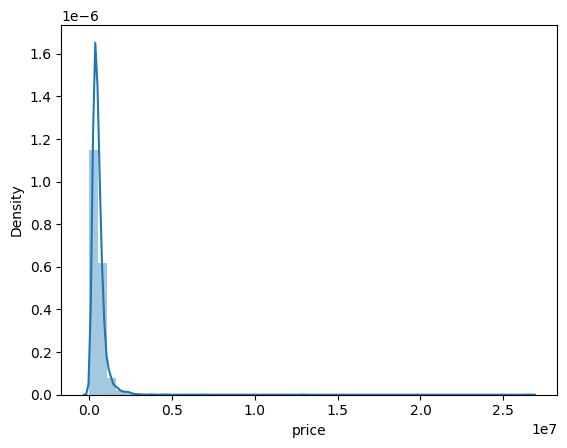

In [116]:
#checking for outlier using distplot
sns.distplot(df['price'])

<Axes: ylabel='price'>

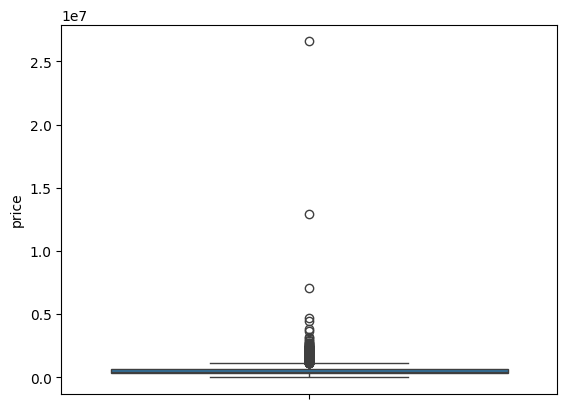

In [117]:
# using boxplot to see the outliers more clearly
sns.boxplot(df['price'])

**Handling the outliers using the IQR (Interquartile Range) Method.**

In [118]:
# First Quartile
q1 = df['price'].quantile(0.25)

# Third Quartile
q3 = df['price'].quantile(0.75)

# Inter Quartile Range
iqr = q3-q1

q1, q3, iqr

(326264.2857145, 657500.0, 331235.7142855)

In [119]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

# values outside this range will be considered as outliers
lower_limit, upper_limit

(-170589.28571375, 1154353.57142825)

<Axes: ylabel='price'>

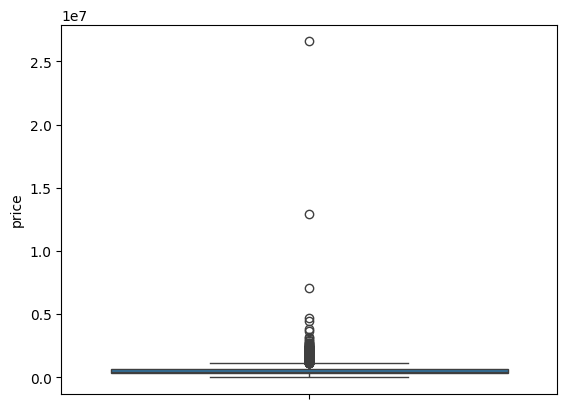

In [120]:
# Before Handling Outliers
sns.boxplot(df['price'])

In [121]:
# Capping - Changing the outlier values to upper (or) Lower Limit values

df.loc[(df['price']>upper_limit), 'price'] = upper_limit

df.loc[(df['price']<lower_limit), 'price'] = lower_limit



Using the upper and lower limits, I capped the outliers instead of removing them completely. As removing outliers entirely from the dataset might lead to a loss of valuable information.

<Axes: ylabel='price'>

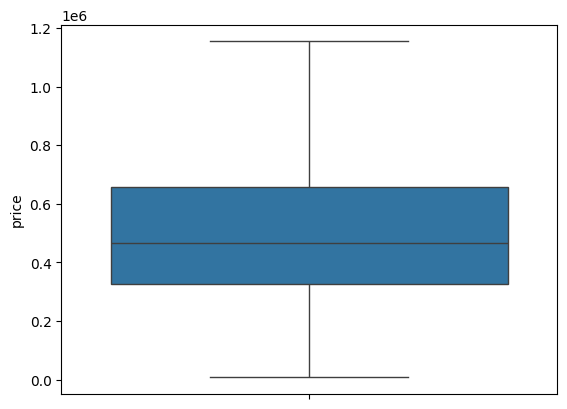

In [122]:
# After Handling Outliers
sns.boxplot(df['price'])

<ipython-input-123-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

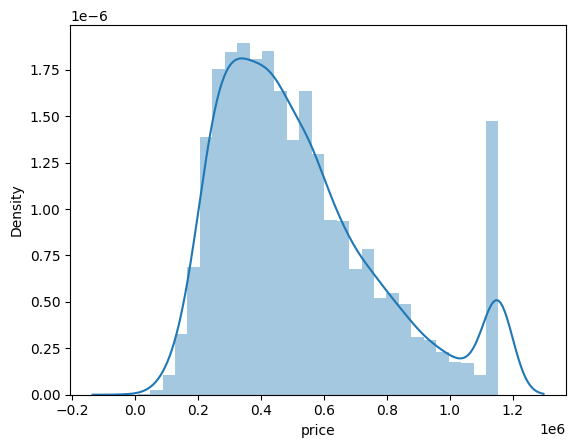

In [123]:
sns.distplot(df['price'])


In [124]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  313000.00         3          1         1340      7912       1           0   
1 1154353.57         5          2         3650      9050       2           0   
2  342000.00         3          2         1930     11947       1           0   
3  420000.00         3          2         2000      8030       1           0   
4  550000.00         4          2         1940     10500       1           0   

   view  condition  sqft_above  sqft_basement  yr_renovated  \
0     0          3        1340              0          2005   
1     4          5        3370            280             0   
2     0          4        1930              0             0   
3     0          4        1000           1000             0   
4     0          4        1140            800          1992   

                     street       city  statezip  age  
0      18810 Densmore Ave N  Shoreline  WA 98133   59  
1           709 W Blaine St    Seattle  WA 98119   93  
2  26206-26214 143rd Ave SE       Kent  WA 98042   48  
3           857 170th Pl NE   Bellevue  WA 98008   51  
4         9105 170th Ave NE    Redmond  WA 98052   38

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4551 non-null   float64
 1   bedrooms       4551 non-null   int64  
 2   bathrooms      4551 non-null   int64  
 3   sqft_living    4551 non-null   int64  
 4   sqft_lot       4551 non-null   int64  
 5   floors         4551 non-null   int64  
 6   waterfront     4551 non-null   int64  
 7   view           4551 non-null   int64  
 8   condition      4551 non-null   int64  
 9   sqft_above     4551 non-null   int64  
 10  sqft_basement  4551 non-null   int64  
 11  yr_renovated   4551 non-null   int64  
 12  street         4551 non-null   object 
 13  city           4551 non-null   object 
 14  statezip       4551 non-null   object 
 15  age            4551 non-null   int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 733.5+ KB


In [126]:
df.describe()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
count    4551.00   4551.00    4551.00      4551.00    4551.00 4551.00   
mean   522626.14      3.39       1.78      2132.37   14835.28    1.46   
std    257445.35      0.90       0.74       955.95   35964.08    0.55   
min      7800.00      0.00       0.00       370.00     638.00    1.00   
25%    326264.29      3.00       1.00      1460.00    5000.00    1.00   
50%    465000.00      3.00       2.00      1970.00    7680.00    1.00   
75%    657500.00      4.00       2.00      2610.00   10978.00    2.00   
max   1154353.57      9.00       8.00     13540.00 1074218.00    3.00   

       waterfront    view  condition  sqft_above  sqft_basement  yr_renovated  \
count     4551.00 4551.00    4551.00     4551.00        4551.00       4551.00   
mean         0.01    0.23       3.45     1822.22         310.15        808.56   
std          0.08    0.77       0.68      854.45         461.99        979.42   
min          0.00    0.00       1.00      370.00           0.00          0.00   
25%          0.00    0.00       3.00     1190.00           0.00          0.00   
50%          0.00    0.00       3.00     1590.00           0.00          0.00   
75%          0.00    0.00       4.00     2300.00         600.00       1999.00   
max          1.00    4.00       5.00     9410.00        4820.00       2014.00   

          age  
count 4551.00  
mean    43.20  
std     29.76  
min      0.00  
25%     17.00  
50%     38.00  
75%     63.00  
max    114.00

## **Checking out the distributions of categorical data/variables against price to get insights:**

### Bedrooms vs Price


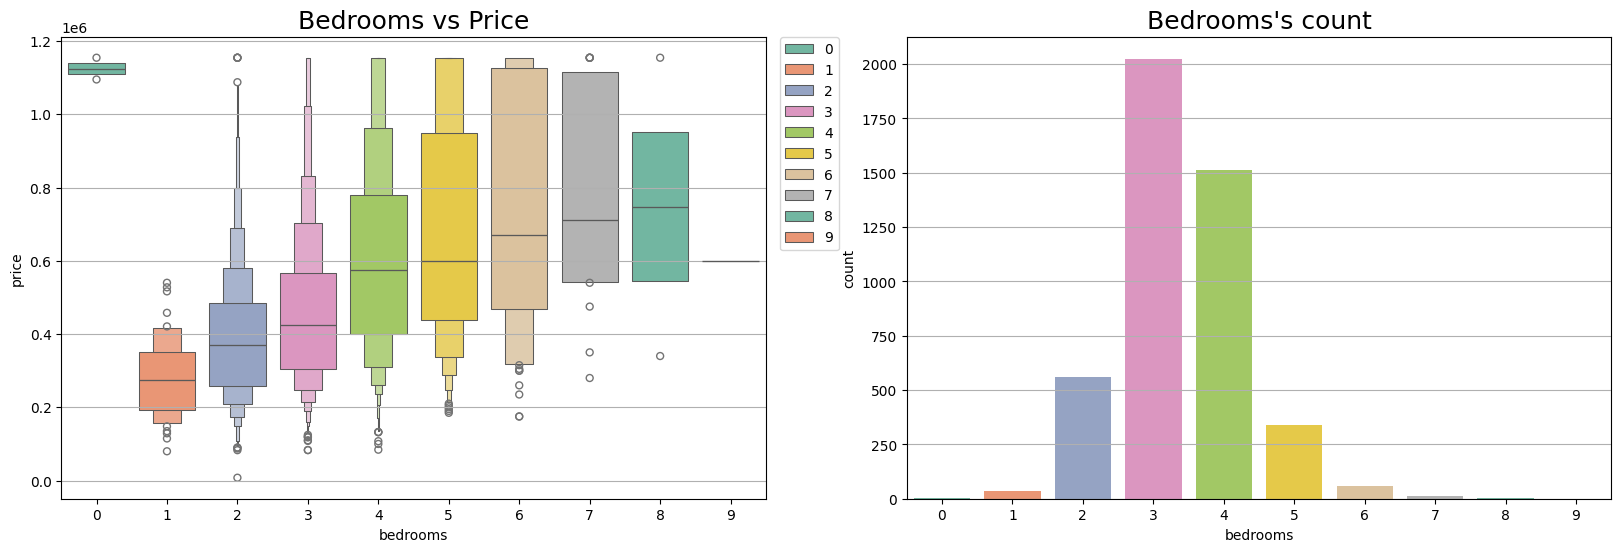

In [127]:
plt.figure(figsize=(20, 6))

# Boxen plot for bedrooms vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='bedrooms', y='price', hue='bedrooms', palette='Set2')
ax.set_title('Bedrooms vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Countplot for bedrooms
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['bedrooms'], hue=df['bedrooms'], palette='Set2', legend=False)
ax.set_title('Bedrooms\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- All the houses in the dataset have 0 to 9 bedrooms.
- The majority of the houses in the dataset have 3 bedrooms.
- The number of bedrooms directly affects the price of a house.
- The price is highest when the number of bedrooms is 0.

### Bathrooms vs Price


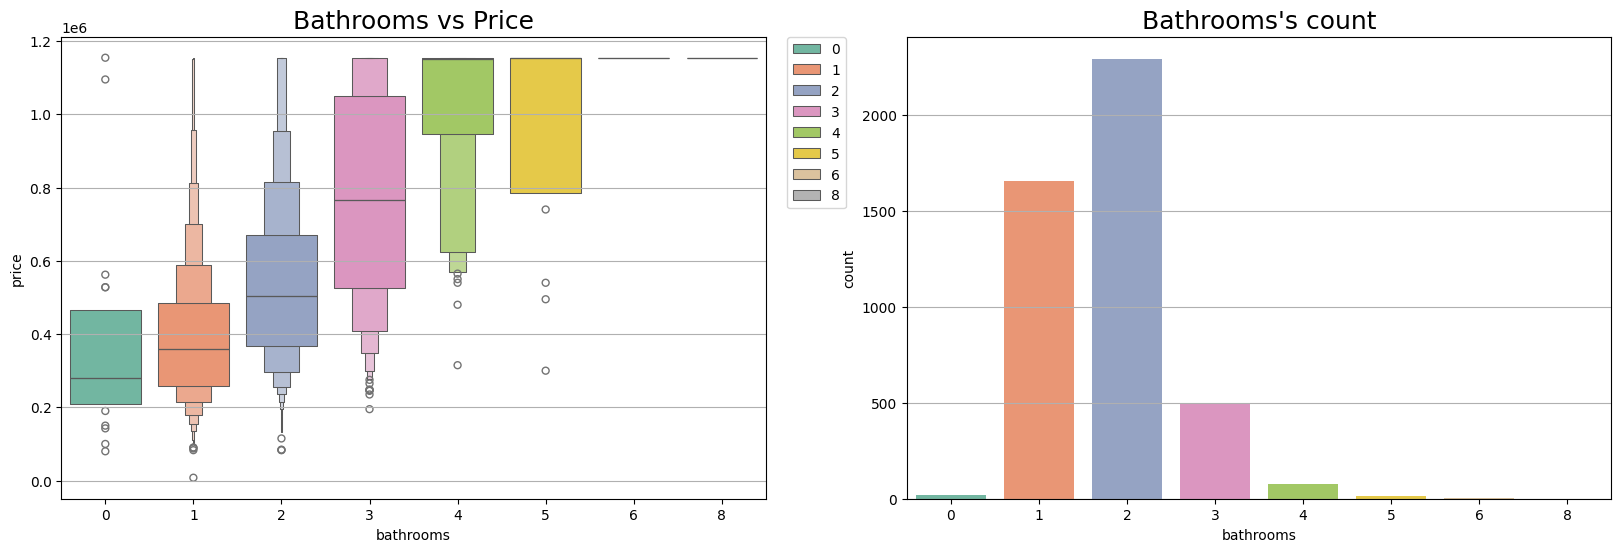

In [128]:
plt.figure(figsize=(20, 6))

# Boxen plot for bathrooms vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='bathrooms', y='price', hue='bathrooms', palette='Set2')
ax.set_title('Bathrooms vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for bathrooms
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['bathrooms'], hue=df['bathrooms'], palette='Set2', legend=False)
ax.set_title('Bathrooms\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- All the houses in the dataset have 0 to 8 bathrooms.
- The majority of the houses in the dataset have 2 bathrooms.
- The number of bathrooms directly affects the price of a house.

### Floors vs Price


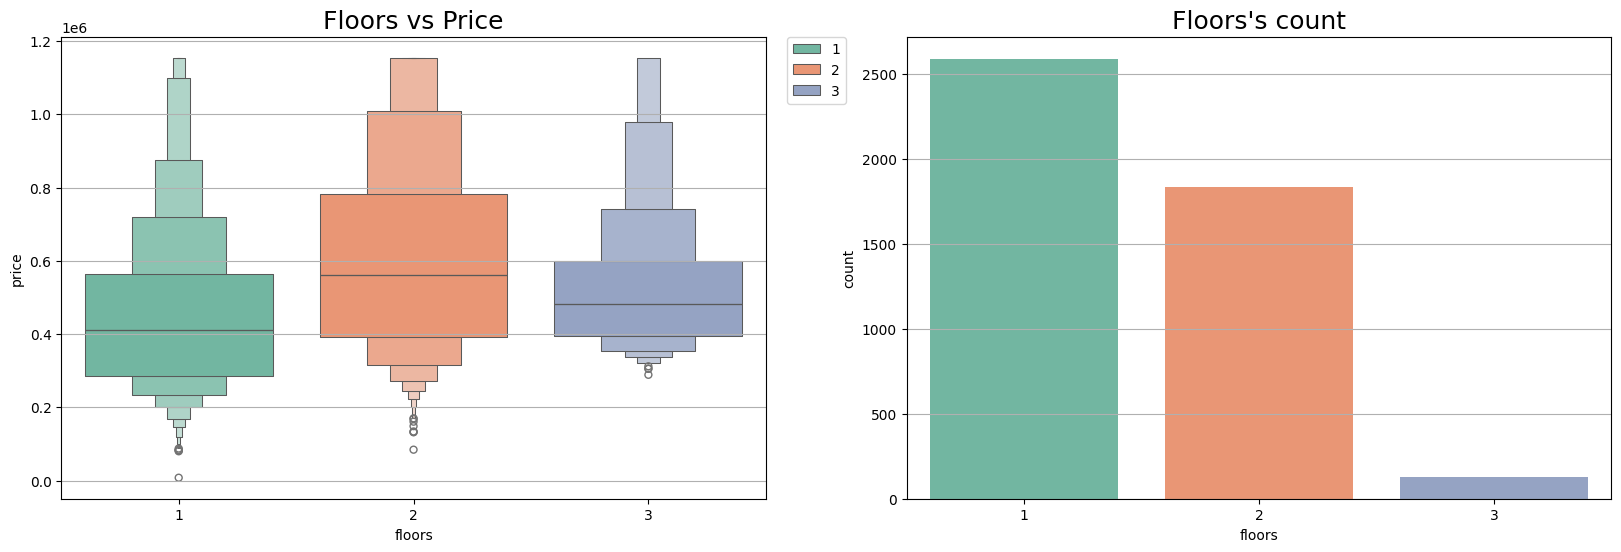

In [129]:
plt.figure(figsize=(20, 6))

# Boxen plot for floors vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='floors', y='price', hue='floors', palette='Set2')
ax.set_title('Floors vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for floors
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['floors'], hue=df['floors'], palette='Set2', legend=False)
ax.set_title('Floors\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- All the houses in the dataset have 1 to 3 floors.
- The majority of the houses in the dataset have 1 floor.
- The prices of the majority of houses with 2 floors are higher than those with 1 or 3 floors.

### Waterfront vs Price


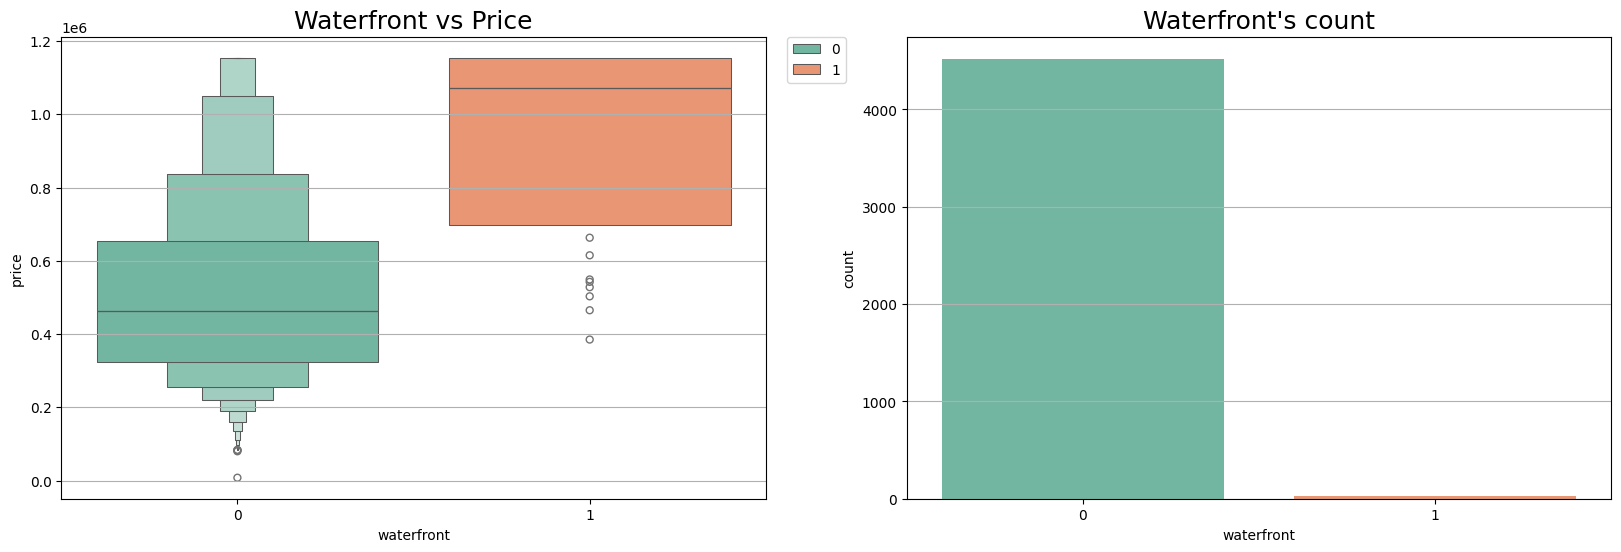

In [130]:
plt.figure(figsize=(20, 6))

# Boxen plot for waterfront vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='waterfront', y='price', hue='waterfront', palette='Set2')
ax.set_title('Waterfront vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for waterfront
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['waterfront'], hue=df['waterfront'], palette='Set2', legend=False)
ax.set_title('Waterfront\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- Most of the houses don't have a waterfront.
- The prices of houses with waterfront are higher than the ones without a waterfront.

### View vs Price


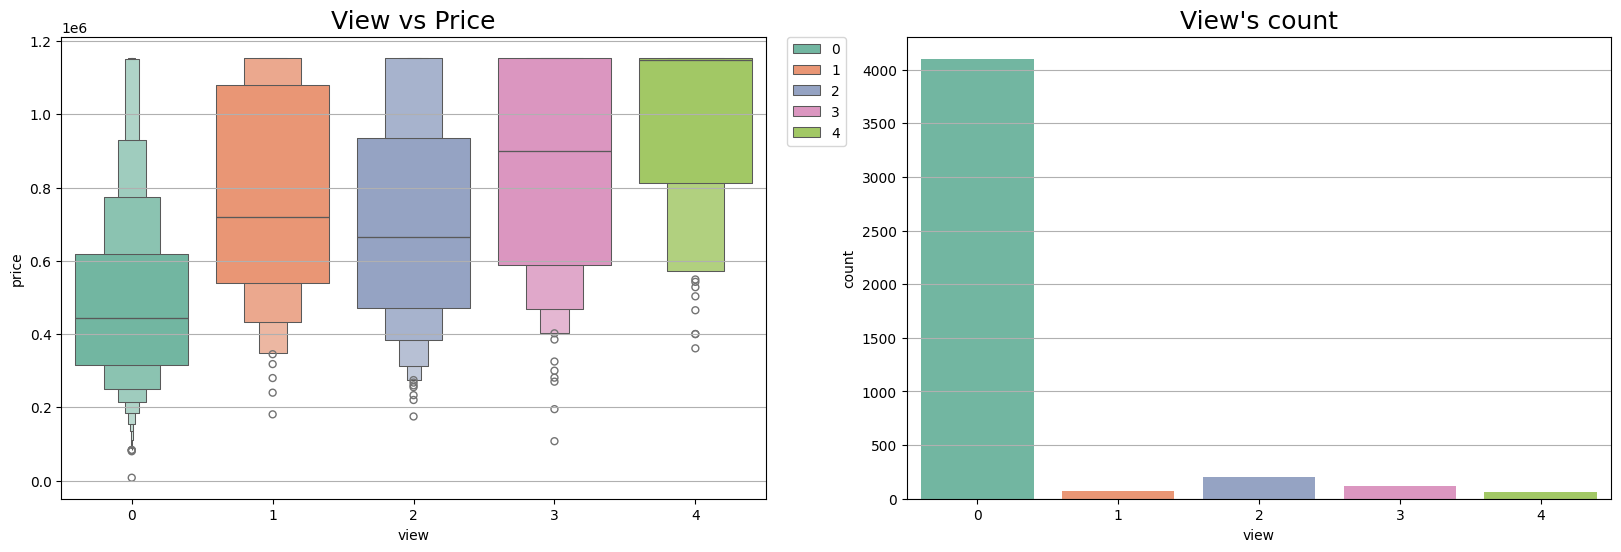

In [131]:
plt.figure(figsize=(20, 6))

# Boxen plot for view vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='view', y='price', hue='view', palette='Set2')
ax.set_title('View vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for view
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['view'], hue=df['view'], palette='Set2', legend=False)
ax.set_title('View\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- Most of the houses don't have a view.
- The prices of houses with 1 or more views are higher than the ones without a view.

### Condition vs Price


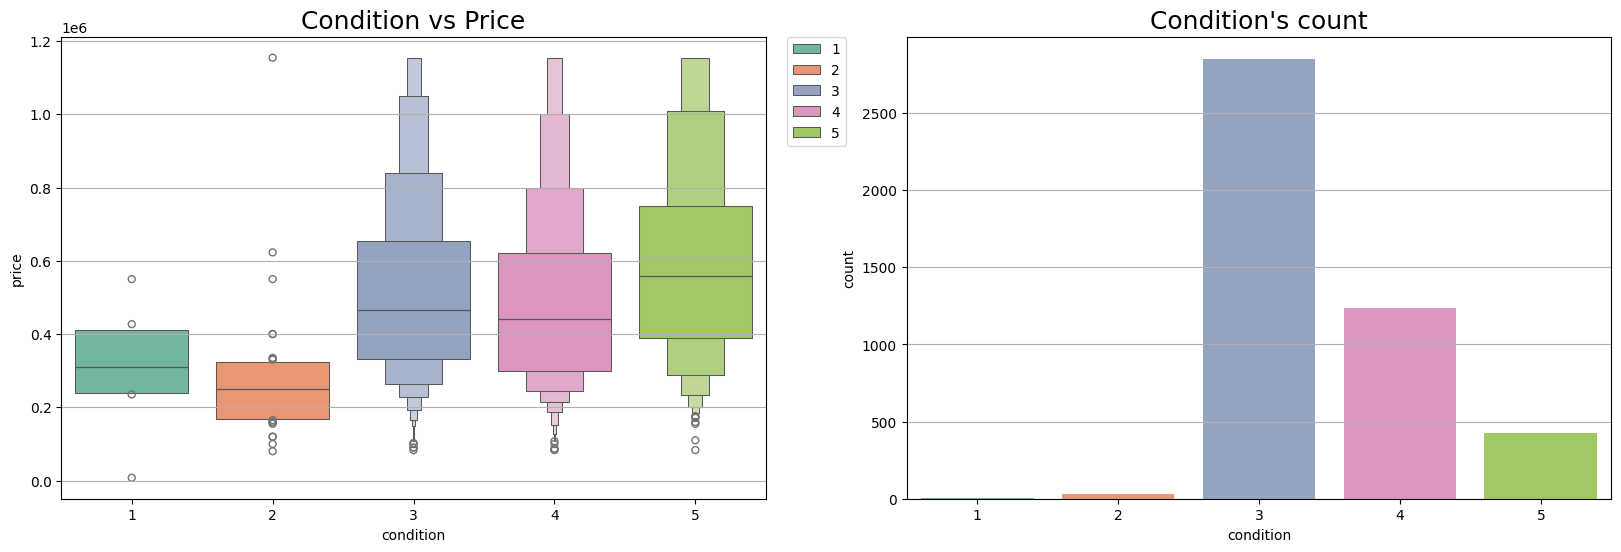

In [132]:
plt.figure(figsize=(20, 6))

# Boxen plot for condition vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='condition', y='price', hue='condition', palette='Set2')
ax.set_title('Condition vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for condition
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['condition'], hue=df['condition'], palette='Set2', legend=False)
ax.set_title('Condition\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- Most of the houses have condition rating 3
- The highest average price belongs to houses with condition rating 5.
- The lowest average price belongs to houses with condition rating 2.

## **Pairplot for numerical data/variables:**

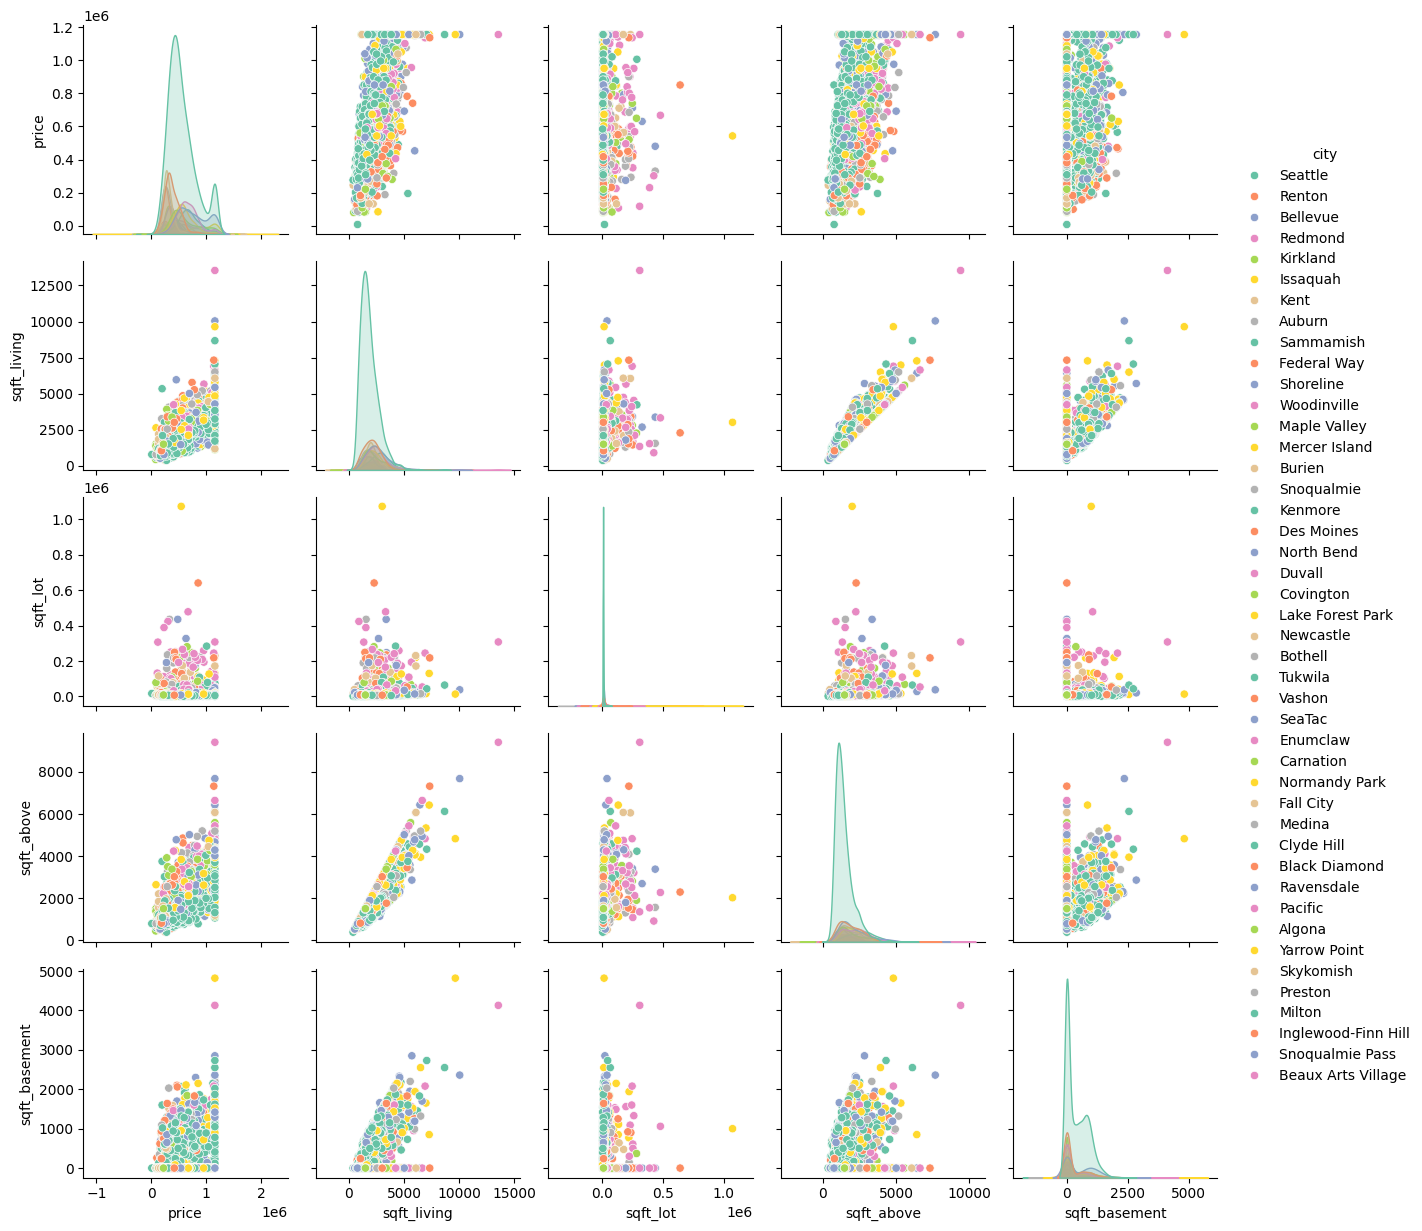

In [133]:
# Numerical variables for pairplot
df_Numerical_Variables = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'city']]

# Calculate city value counts and sort in descending order
city_counts = df['city'].value_counts().sort_values(ascending=False)

# Get ordered city names
ordered_city_names = city_counts.index

# Creating the pairplot with hue as city
sns.pairplot(df_Numerical_Variables, hue='city', hue_order=ordered_city_names, palette='Set2')
plt.show()

In [134]:
len(df['city'].value_counts())-1 #decreasing 1 for column heading

43

In [135]:
df['city'].value_counts()

city
Seattle                1561
Renton                  291
Bellevue                281
Redmond                 235
Kirkland                187
Issaquah                186
Kent                    184
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Medina                   11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific        

**Insights:**
- The dataset contains housing data from **43** different cities.
- Most of the house data is from **Seattle**.
- Most of the houses in **Seattle** have the highest price.

## **Creating copies of Main DF for comparison**

The objective is to compare the performance of models with and without location attributes. In order to evaluate I will be doing four different models for each algorithm using different data frames:

1. Housing data of multiple cities with location atributes.

2. Housing data of multiple cities without location atributes (only structural attributes).

3. Housing data of one city with location atributes.

4. Housing data of one city without location atributes (only structural attributes).

I selected **Seattle** city, as it has the majority of the data compared to other cities in the dataset. Making it a suitable City for Housing data of one city with and without location atributes.

 **Creating a copy of Df with Seattle only:**

In [136]:
df['city'].value_counts()

city
Seattle                1561
Renton                  291
Bellevue                281
Redmond                 235
Kirkland                187
Issaquah                186
Kent                    184
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Medina                   11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific        

In [137]:
seattle_df = df.copy()
seattle_df = seattle_df[seattle_df['city'] == 'Seattle']
#dropping the city column as now everything is Seattle (it doesn't affect predictive power)
seattle_df = seattle_df.drop(['city'], axis=1)
seattle_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1    1154353.57         5          2         3650      9050       2   
5     490000.00         2          1          880      6380       1   
9     640000.00         4          2         1520      6200       1   
11   1154353.57         4          2         2920      4000       1   
13    365000.00         3          1         1090      6435       1   
...         ...       ...        ...          ...       ...     ...   
4582  406062.50         2          1         1290      4650       1   
4585  486895.00         3          1         1890      3330       1   
4591  396166.67         3          1         1880      5752       1   
4595  308166.67         3          1         1510      6360       1   
4598  203400.00         4          2         2090      6630       1   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
1              0     4          5        3370            280             0   
5              0     0          3         880              0          1994   
9              0     0          3        1520              0          2010   
11             0     0          5        1910           1010          1988   
13             0     0          4        1090              0          2009   
...          ...   ...        ...         ...            ...           ...   
4582           0     0          4        1290              0          1990   
4585           0     0          4        1390            500             0   
4591           0     0          4         940            940             0   
4595           0     0          4        1510              0          1979   
4598           0     0          3        1070           1020             0   

                     street  statezip  age  
1           709 W Blaine St  WA 98119   93  
5            522 NE 88th St  WA 98115   76  
9          6811 55th Ave NE  WA 98115   69  
11    3838-4098 44th Ave NE  WA 98105  105  
13      2504 SW Portland Ct  WA 98106   59  
...                     ...       ...  ...  
4582         312 NE 81st St  WA 98115  108  
4585      4324 Dayton Ave N  WA 98103  113  
4591     3529 SW Webster St  WA 98126   69  
4595         501 N 143rd St  WA 98133   60  
4598      5148 S Creston St  WA 98178   40  

[1561 rows x 15 columns]

## **Encoding Strings to Categorized Values**

I'm using **MEstimateEncoder** because it's a powerful encoding technique that captures the relationship between categorical variables and the target variable. By considering the mean target value of each category and applying smoothing, MEstimateEncoder provides robust encoding, particularly useful for categorical variables with a large number of categories or imbalanced distributions.

For some reason the library is not installed by default, so I'm installing the library **category_encorders** to access **MEstimateEncoder**

In [138]:
pip install category_encoders

### **Encoding Main DF**

In [139]:
#for main df
from category_encoders import MEstimateEncoder

# Initializing MEstimateEncoder for the specified columns
encoder = MEstimateEncoder(cols=['street', 'city', 'statezip'], m=0.5)

# Fitting the encoder to the data
encoder.fit(df[['street', 'city', 'statezip']], df['price'])

# Transforming the categorical columns
df[['street', 'city', 'statezip']] = encoder.transform(df[['street', 'city', 'statezip']])
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.00         3          1         1340      7912       1   
1    1154353.57         5          2         3650      9050       2   
2     342000.00         3          2         1930     11947       1   
3     420000.00         3          2         2000      8030       1   
4     550000.00         4          2         1940     10500       1   
...         ...       ...        ...          ...       ...     ...   
4595  308166.67         3          1         1510      6360       1   
4596  534333.33         3          2         1460      7573       2   
4597  416904.17         3          2         3010      7014       2   
4598  203400.00         4          2         2090      6630       1   
4599  220600.00         3          2         1490      8102       2   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
0              0     0          3        1340              0          2005   
1              0     4          5        3370            280             0   
2              0     0          4        1930              0             0   
3              0     0          4        1000           1000             0   
4              0     0          4        1140            800          1992   
...          ...   ...        ...         ...            ...           ...   
4595           0     0          4        1510              0          1979   
4596           0     0          3        1460              0          2009   
4597           0     0          3        3010              0             0   
4598           0     0          3        1070           1020             0   
4599           0     0          4        1490              0             0   

        street      city  statezip  age  
0    382875.38 409216.85 375225.71   59  
1    943777.76 550661.62 788702.93   93  
2    402208.71 304237.23 317159.02   48  
3    454208.71 763562.14 583557.29   51  
4    540875.38 657295.69 632472.64   38  
...        ...       ...       ...  ...  
4595 379653.16 550661.62 375225.71   60  
4596 530430.94 763562.14 652251.95   31  
4597 452144.82 379877.59 498707.34    5  
4598 309808.71 550661.62 277747.86   40  
4599 321275.38 281262.91 317159.02   24  

[4551 rows x 16 columns]

### **Standard Scaling Main DF**

In [140]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['street', 'city', 'statezip']

data_to_scale = df[columns_to_scale]

#Standard Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=df.index)

# Replacing Original Columns with Scaled Values
df[columns_to_scale] = scaled_df
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.00         3          1         1340      7912       1   
1    1154353.57         5          2         3650      9050       2   
2     342000.00         3          2         1930     11947       1   
3     420000.00         3          2         2000      8030       1   
4     550000.00         4          2         1940     10500       1   
...         ...       ...        ...          ...       ...     ...   
4595  308166.67         3          1         1510      6360       1   
4596  534333.33         3          2         1460      7573       2   
4597  416904.17         3          2         3010      7014       2   
4598  203400.00         4          2         2090      6630       1   
4599  220600.00         3          2         1490      8102       2   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
0              0     0          3        1340              0          2005   
1              0     4          5        3370            280             0   
2              0     0          4        1930              0             0   
3              0     0          4        1000           1000             0   
4              0     0          4        1140            800          1992   
...          ...   ...        ...         ...            ...           ...   
4595           0     0          4        1510              0          1979   
4596           0     0          3        1460              0          2009   
4597           0     0          3        3010              0             0   
4598           0     0          3        1070           1020             0   
4599           0     0          4        1490              0             0   

      street  city  statezip  age  
0      -0.81 -0.76     -0.82   59  
1       2.45  0.19      1.47   93  
2      -0.70 -1.46     -1.14   48  
3      -0.40  1.61      0.34   51  
4       0.11  0.90      0.61   38  
...      ...   ...       ...  ...  
4595   -0.83  0.19     -0.82   60  
4596    0.05  1.61      0.72   31  
4597   -0.41 -0.96     -0.13    5  
4598   -1.24  0.19     -1.36   40  
4599   -1.17 -1.62     -1.14   24  

[4551 rows x 16 columns]

### **Encoding Seattle DF**

In [141]:
# for seattle df
# Initializing MEstimateEncoder for the specified columns
encoder = MEstimateEncoder(cols=['street', 'statezip'], m=0.5)

# Fitting the encoder to the data
encoder.fit(seattle_df[['street', 'statezip']], seattle_df['price'])

# Transforming the categorical columns
seattle_df[['street', 'statezip',]] = encoder.transform(seattle_df[['street', 'statezip']])
seattle_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1    1154353.57         5          2         3650      9050       2   
5     490000.00         2          1          880      6380       1   
9     640000.00         4          2         1520      6200       1   
11   1154353.57         4          2         2920      4000       1   
13    365000.00         3          1         1090      6435       1   
...         ...       ...        ...          ...       ...     ...   
4582  406062.50         2          1         1290      4650       1   
4585  486895.00         3          1         1890      3330       1   
4591  396166.67         3          1         1880      5752       1   
4595  308166.67         3          1         1510      6360       1   
4598  203400.00         4          2         2090      6630       1   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
1              0     4          5        3370            280             0   
5              0     0          3         880              0          1994   
9              0     0          3        1520              0          2010   
11             0     0          5        1910           1010          1988   
13             0     0          4        1090              0          2009   
...          ...   ...        ...         ...            ...           ...   
4582           0     0          4        1290              0          1990   
4585           0     0          4        1390            500             0   
4591           0     0          4         940            940             0   
4595           0     0          4        1510              0          1979   
4598           0     0          3        1070           1020             0   

        street  statezip  age  
1    953125.91 788986.21   93  
5    510223.53 594160.32   76  
9    610223.53 594160.32   69  
11   953125.91 813050.92  105  
13   426890.20 299120.33   59  
...        ...       ...  ...  
4582 454265.20 594160.32  108  
4585 508153.53 573828.48  113  
4591 447667.98 424005.63   69  
4595 389001.31 382910.76   60  
4598 319156.87 279887.26   40  

[1561 rows x 15 columns]

### **Standard Scaling Seattle DF**

In [142]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['street', 'statezip']

data_to_scale = df[columns_to_scale]

#Standard Scaling
scaler = StandardScaler()
scaled_seattle_data = scaler.fit_transform(data_to_scale)
scaled_seattle_df = pd.DataFrame(scaled_seattle_data, columns=columns_to_scale, index=df.index)

# Replacing Original Columns with Scaled Values
seattle_df[columns_to_scale] = scaled_seattle_df
seattle_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1    1154353.57         5          2         3650      9050       2   
5     490000.00         2          1          880      6380       1   
9     640000.00         4          2         1520      6200       1   
11   1154353.57         4          2         2920      4000       1   
13    365000.00         3          1         1090      6435       1   
...         ...       ...        ...          ...       ...     ...   
4582  406062.50         2          1         1290      4650       1   
4585  486895.00         3          1         1890      3330       1   
4591  396166.67         3          1         1880      5752       1   
4595  308166.67         3          1         1510      6360       1   
4598  203400.00         4          2         2090      6630       1   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
1              0     4          5        3370            280             0   
5              0     0          3         880              0          1994   
9              0     0          3        1520              0          2010   
11             0     0          5        1910           1010          1988   
13             0     0          4        1090              0          2009   
...          ...   ...        ...         ...            ...           ...   
4582           0     0          4        1290              0          1990   
4585           0     0          4        1390            500             0   
4591           0     0          4         940            940             0   
4595           0     0          4        1510              0          1979   
4598           0     0          3        1070           1020             0   

      street  statezip  age  
1       2.45      1.47   93  
5      -0.13      0.39   76  
9       0.46      0.39   69  
11      2.45      1.60  105  
13     -0.61     -1.24   59  
...      ...       ...  ...  
4582   -0.45      0.39  108  
4585   -0.14      0.28  113  
4591   -0.49     -0.55   69  
4595   -0.83     -0.82   60  
4598   -1.24     -1.36   40  

[1561 rows x 15 columns]

## **Corr Heatmap**

### **For Main DF**

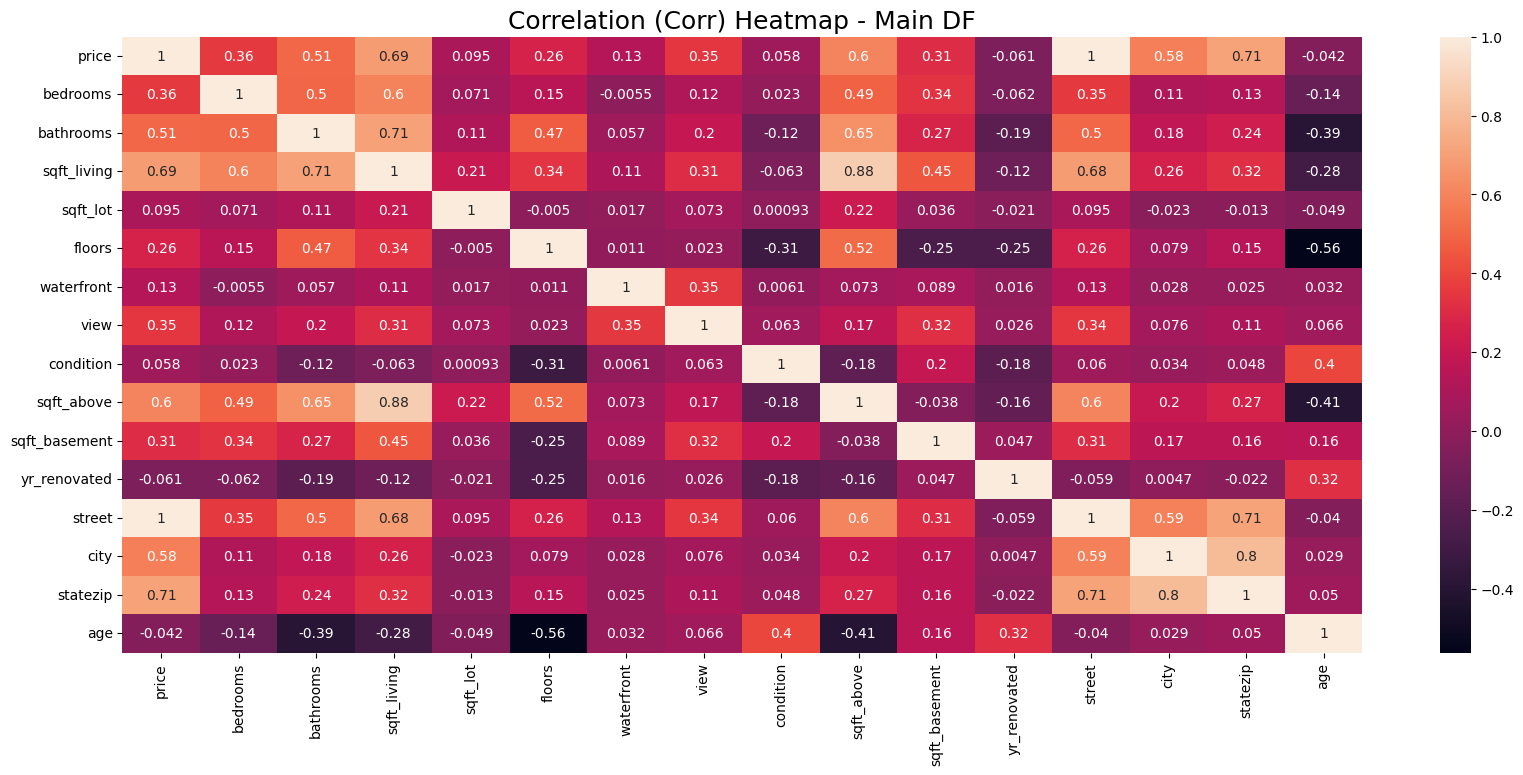

In [143]:
plt.figure(figsize=(20, 8))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_title('Correlation (Corr) Heatmap - Main DF', fontdict={'fontsize': 18})
plt.show()

### **For Seattle DF**

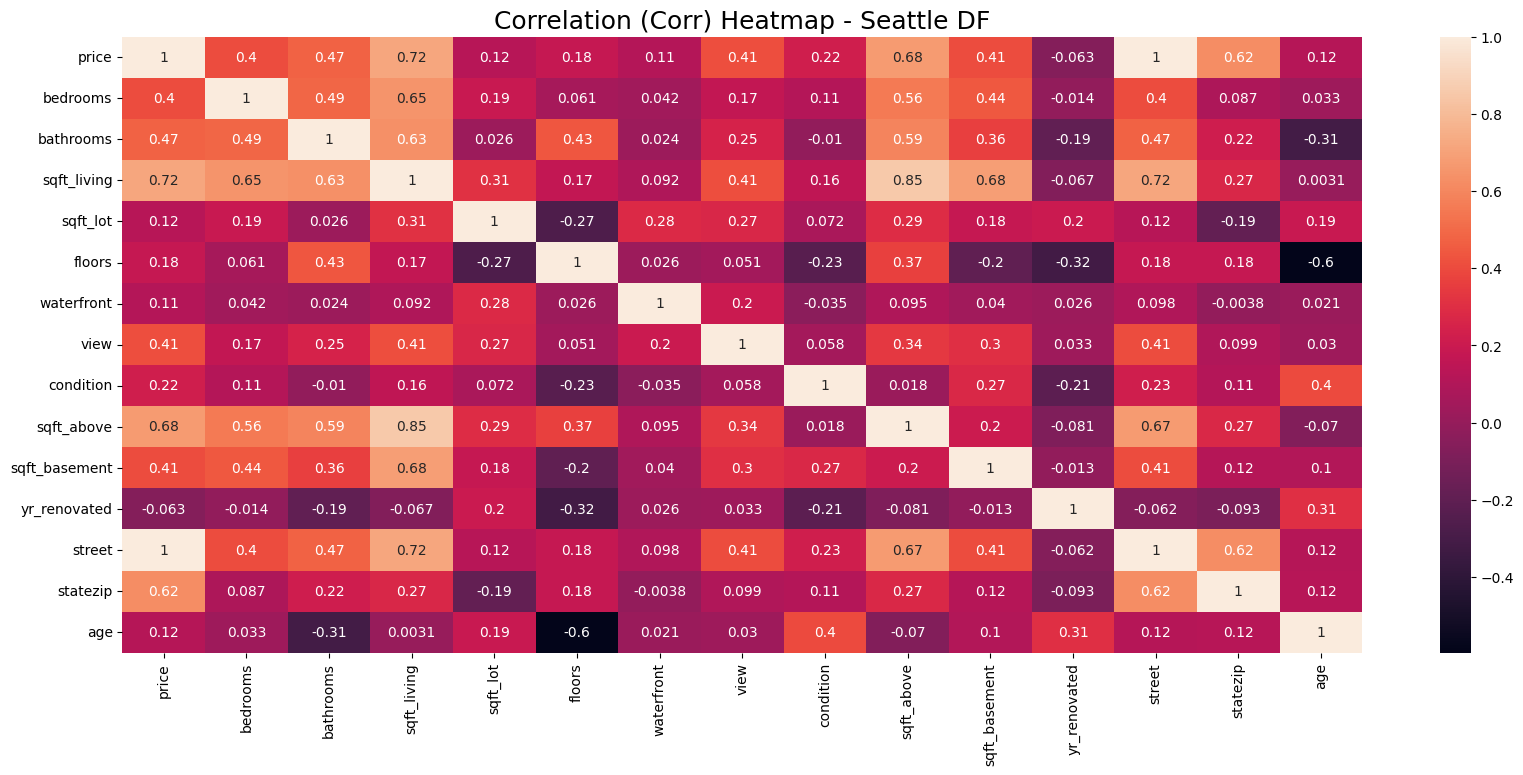

In [144]:
plt.figure(figsize=(20, 8))
ax = sns.heatmap(seattle_df.corr(), annot=True)
ax.set_title('Correlation (Corr) Heatmap - Seattle DF', fontdict={'fontsize': 18})
plt.show()

# **The Machine Learning Models**

## **Linear Regression**

### **Linear Regression** - Multiple Cities Data **with** Location Attributes.

In [145]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)

In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 15), (911, 15), (3640,), (911,))

In [147]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Multi_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Multi_With_Location} seconds")

Elapsed time: 0.04816079139709473 seconds


In [148]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Multi_With_Location = End_Time - Start_Time


MSE_Linear_Multi_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Multi_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Multi_With_Location = r2_score(y_test, predictions)


print('Linear Regression Model - Multiple Cities Data with location Atributes')
print(f'MSE: {MSE_Linear_Multi_With_Location:.4f}')
print(f'RMSE: {RMSE_Linear_Multi_With_Location:.4f}')
print(f'R2 Score: {R2_Linear_Multi_With_Location:.12f}')

Linear Regression Model - Multiple Cities Data with location Atributes
MSE: 91359624.6382
RMSE: 9558.2229
R2 Score: 0.998629483466


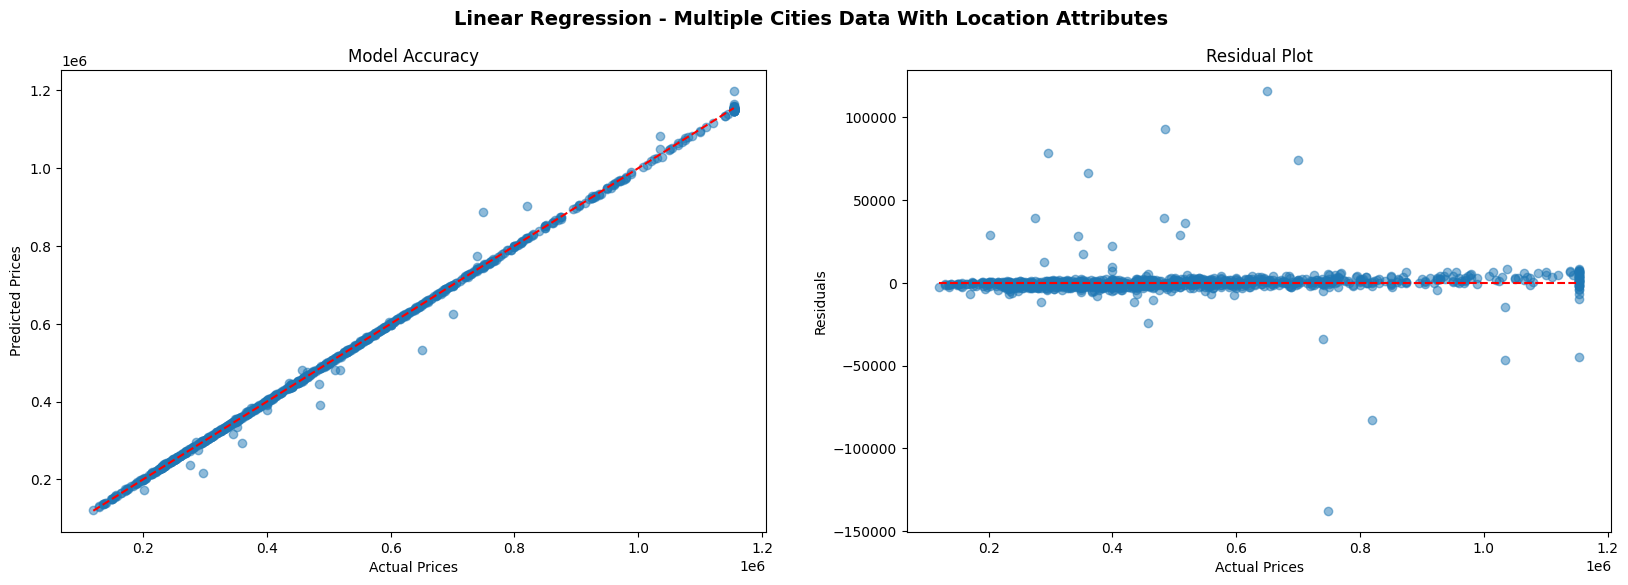

In [149]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Multiple Cities Data With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Linear Regression** - Multiple Cities Data **without** Location Attributes.

In [150]:
Data_X_Without_Location = df.drop(columns=['price', 'city', 'statezip', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)

In [151]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 12), (911, 12), (3640,), (911,))

In [152]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Multi_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Multi_Without_Location} seconds")

Elapsed time: 0.017606258392333984 seconds


In [153]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Multi_Without_Location = End_Time - Start_Time

MSE_Linear_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Multi_Without_Location = r2_score(y_test, predictions)

print('Linear Regression Model - Multiple Cities Data without location Atributes')
print(f'MSE: {MSE_Linear_Multi_Without_Location:.4f}')
print(f'RMSE: {RMSE_Linear_Multi_Without_Location:.4f}')
print(f'R2 Score: {R2_Linear_Multi_Without_Location:.12f}')

Linear Regression Model - Multiple Cities Data without location Atributes
MSE: 28285511808.6083
RMSE: 168182.9712
R2 Score: 0.575679499986


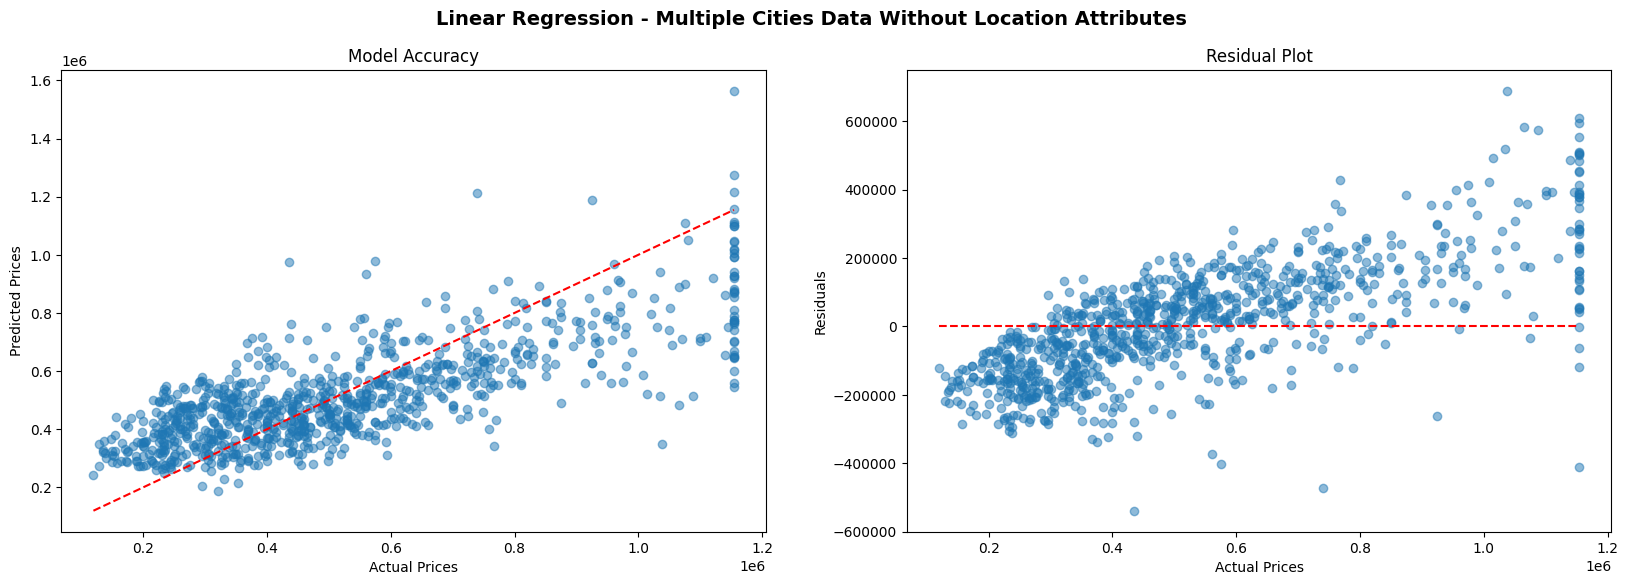

In [154]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Multiple Cities Data Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Linear Regression** - Seattle City Data **with** Location Attributes.

In [155]:
Seattle_Data_X = seattle_df.drop(columns=['price'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)

In [156]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 14), (313, 14), (1248,), (313,))

In [157]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Seattle_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Seattle_With_Location} seconds")

Elapsed time: 0.00526118278503418 seconds


In [158]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Seattle_With_Location = End_Time - Start_Time

MSE_Linear_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Seattle_With_Location = r2_score(y_test, predictions)

print('Linear Regression - Seattle City Data with Location Attributes.')
print(f'MSE: {MSE_Linear_Seattle_With_Location:.4f}')
print(f'RMSE: {RMSE_Linear_Seattle_With_Location:.4f}')
print(f'R2 Score: {R2_Linear_Seattle_With_Location:.12f}')

Linear Regression - Seattle City Data with Location Attributes.
MSE: 93475063.4702
RMSE: 9668.2503
R2 Score: 0.998636166532


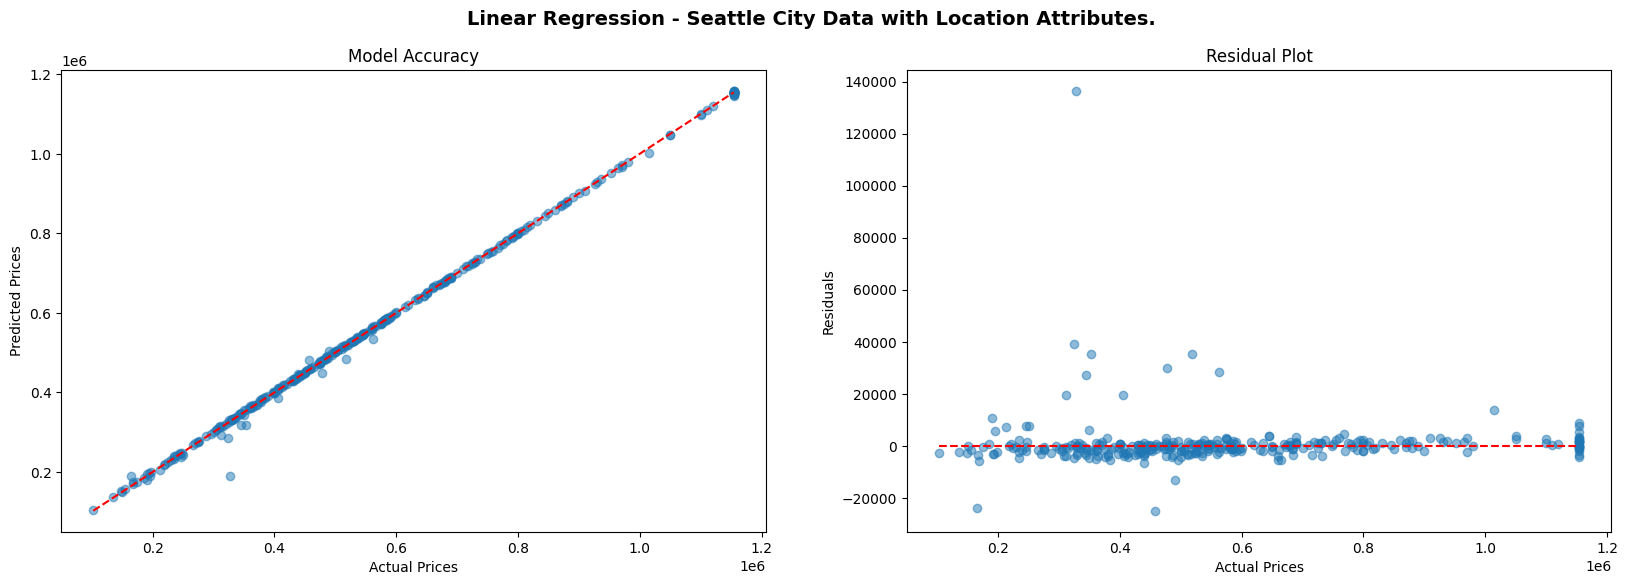

In [159]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Seattle City Data with Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

### **Linear Regression** - Seattle City Data **without** Location Attributes.

In [160]:
Seattle_Data_X_Without_Location = seattle_df.drop(columns=['price', 'statezip', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X_Without_Location, Seattle_Data_Y, test_size=0.2, random_state=92)

In [161]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 12), (313, 12), (1248,), (313,))

In [162]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Seattle_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Seattle_Without_Location} seconds")

Elapsed time: 0.005563974380493164 seconds


In [163]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Seattle_Without_Location = End_Time - Start_Time

MSE_Linear_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Seattle_Without_Location = r2_score(y_test, predictions)

print('Linear Regression - Seattle City Data without Location Attributes.')
print(f'MSE: {MSE_Linear_Seattle_Without_Location:.4f}')
print(f'RMSE: {RMSE_Linear_Seattle_Without_Location:.4f}')
print(f'R2 Score: {R2_Linear_Seattle_Without_Location:.12f}')

Linear Regression - Seattle City Data without Location Attributes.
MSE: 25253674615.4589
RMSE: 158914.0479
R2 Score: 0.631540163278


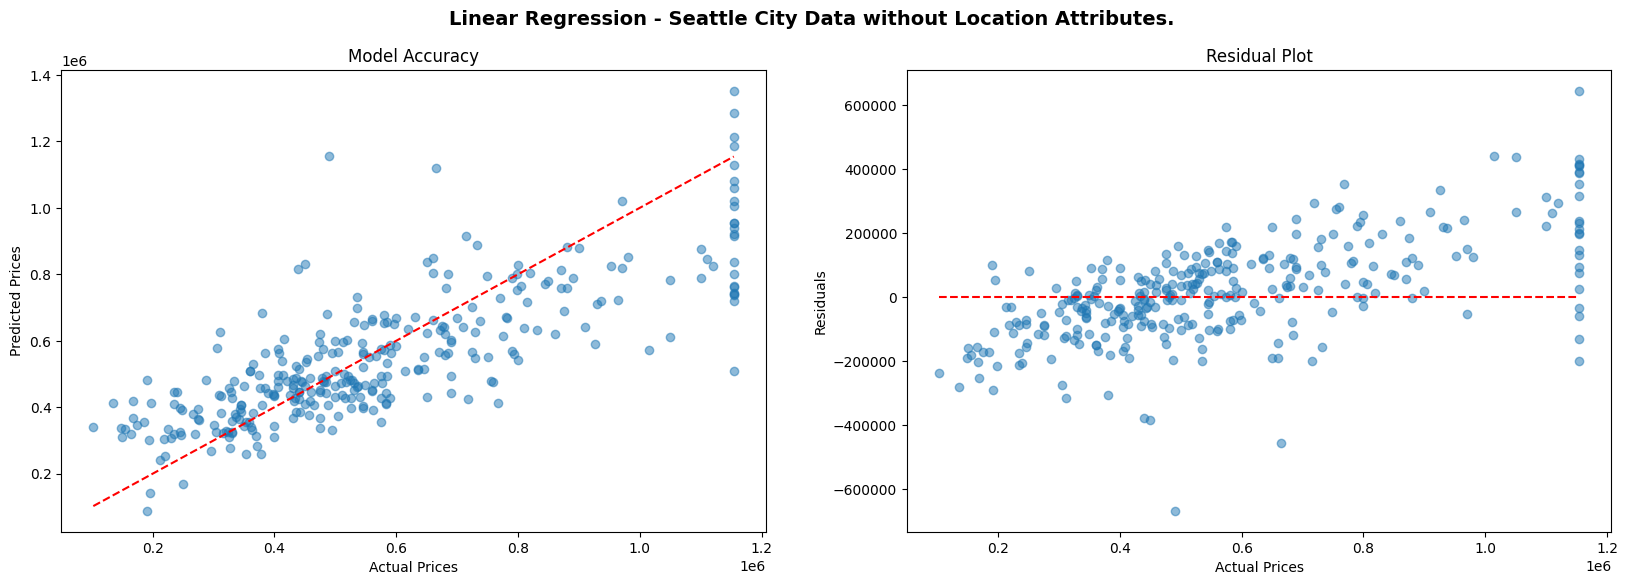

In [164]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Seattle City Data without Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

## **Support Vector Regression (SVR)**

### **SVR** - Multiple Cities Data **with** Location Attributes.

In [165]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']


# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)

In [166]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 15), (911, 15), (3640,), (911,))

In [167]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Multi_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Multi_With_Location} seconds")

Elapsed time: 50.98963451385498 seconds


In [168]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Multi_With_Location = End_Time - Start_Time

MSE_SVR_Multi_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_SVR_Multi_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_SVR_Multi_With_Location = r2_score(y_test, predictions)

print('Support Vector Regression (SVR) - Multiple Cities Data With Location Attributes')
print(f'MSE: {MSE_SVR_Multi_With_Location:.4f}')
print(f'RMSE: {RMSE_SVR_Multi_With_Location:.4f}')
print(f'R2 Score: {R2_SVR_Multi_With_Location:.12f}')

Support Vector Regression (SVR) - Multiple Cities Data With Location Attributes
MSE: 29344082470.0243
RMSE: 171301.1456
R2 Score: 0.559799524563


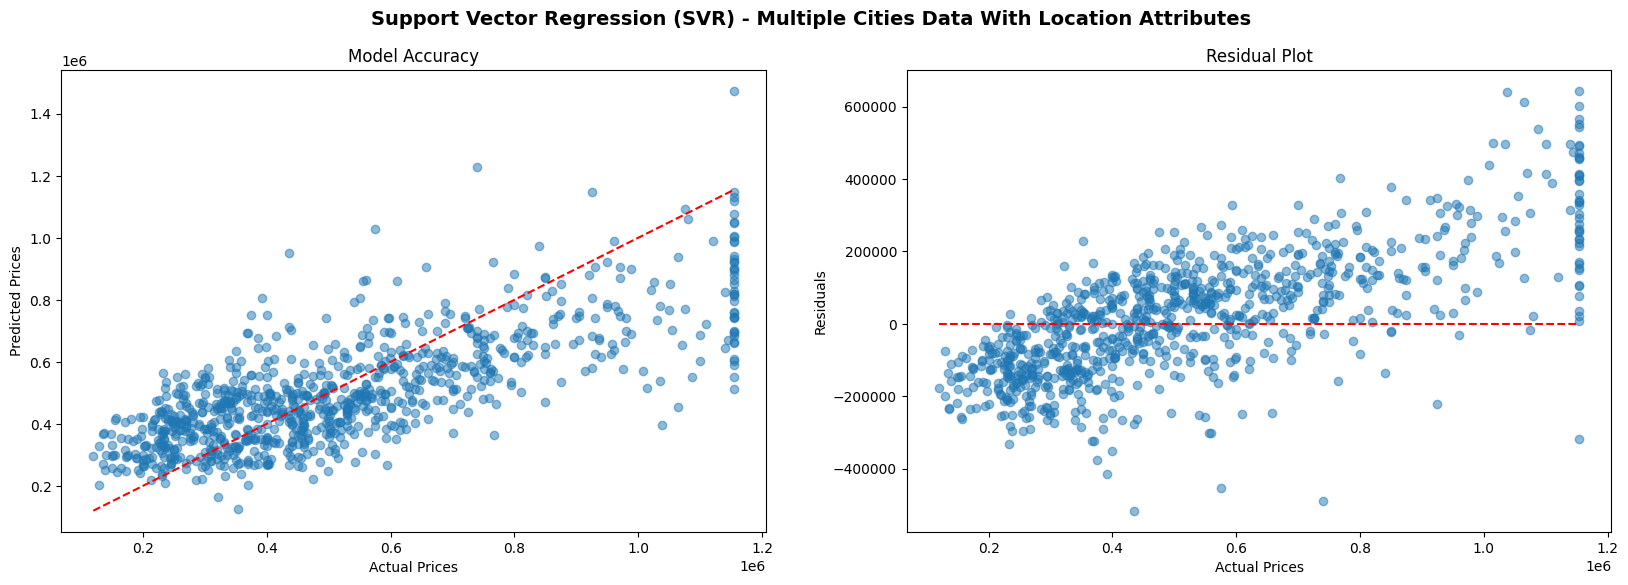

In [169]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Multiple Cities Data With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **SVR** - Multiple Cities Data **without** Location Attributes.

In [170]:
Data_X_Without_Location = df.drop(columns=['price', 'city', 'statezip', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)

In [171]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 12), (911, 12), (3640,), (911,))

In [172]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Multi_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Multi_Without_Location} seconds")

Elapsed time: 153.287841796875 seconds


In [173]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Multi_Without_Location = End_Time - Start_Time

MSE_SVR_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions)
R2_SVR_Multi_Without_Location = r2_score(y_test, predictions)
RMSE_SVR_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)

print('Support Vector Regression (SVR) - Multiple Cities Data Without Location Attributes')
print(f'MSE: {MSE_SVR_Multi_Without_Location:.4f}')
print(f'RMSE: {RMSE_SVR_Multi_Without_Location:.4f}')
print(f'R2 Score: {R2_SVR_Multi_Without_Location:.12f}')

Support Vector Regression (SVR) - Multiple Cities Data Without Location Attributes
MSE: 30636417480.4770
RMSE: 175032.6183
R2 Score: 0.540412771319


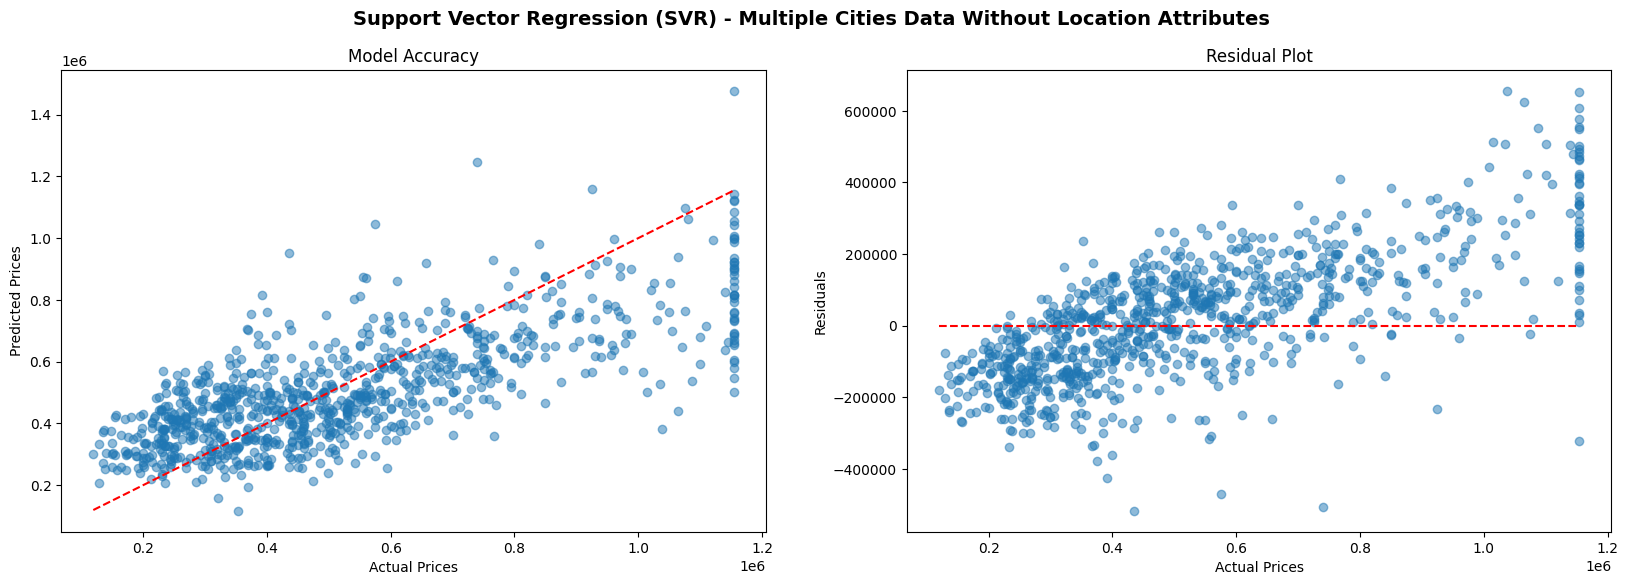

In [174]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Multiple Cities Data Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **SVR** - Seattle City Data **with** Location Attributes.

In [175]:
Seattle_Data_X = seattle_df.drop(columns=['price'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)


In [176]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 14), (313, 14), (1248,), (313,))

In [177]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Seattle_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Seattle_With_Location} seconds")

Elapsed time: 0.6152238845825195 seconds


In [178]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Seattle_With_Location = End_Time - Start_Time

MSE_SVR_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_SVR_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_SVR_Seattle_With_Location = r2_score(y_test, predictions)

print('Support Vector Regression (SVR) - Seattle City Data with Location Attributes.')
print(f'MSE: {MSE_SVR_Seattle_With_Location:.4f}')
print(f'RMSE: {RMSE_SVR_Seattle_With_Location:.4f}')
print(f'R2 Score: {R2_SVR_Seattle_With_Location:.12f}')

Support Vector Regression (SVR) - Seattle City Data with Location Attributes.
MSE: 28581549511.1019
RMSE: 169060.7864
R2 Score: 0.582985318910


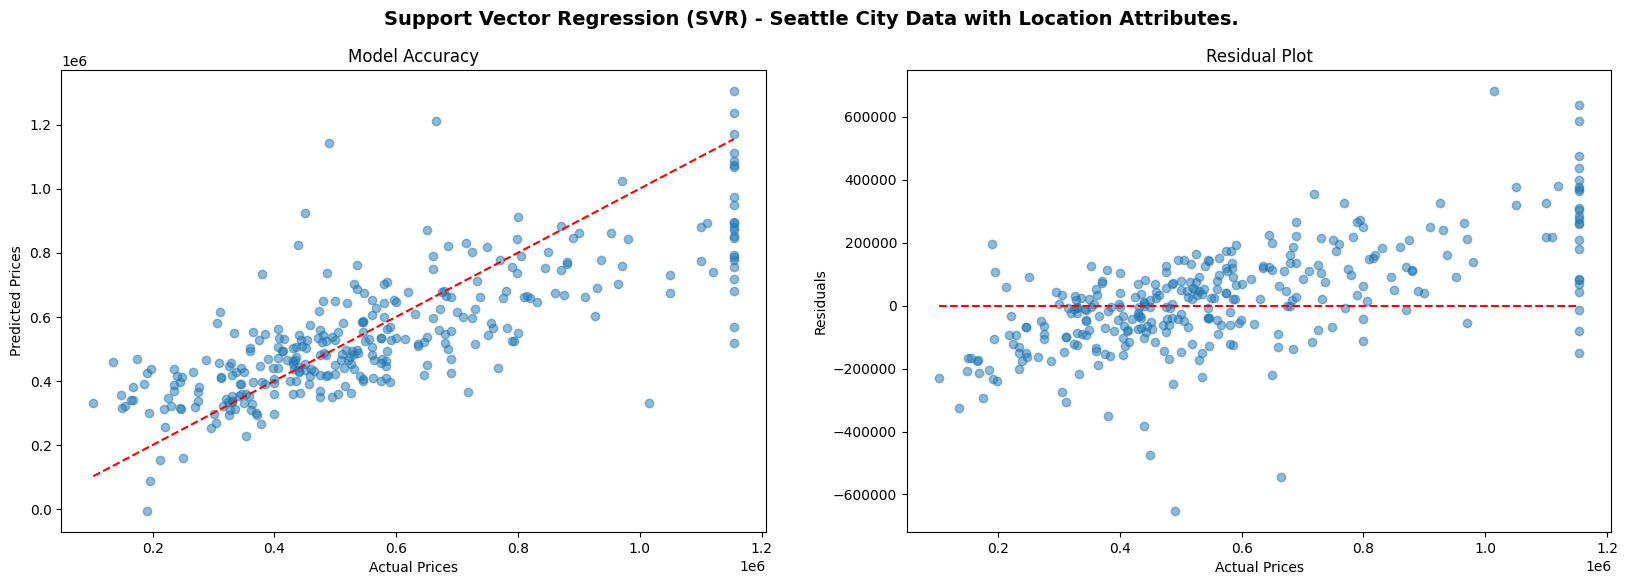

In [179]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Seattle City Data with Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

### **SVR** - Seattle City Data **without** Location Attributes.

In [180]:
Seattle_Data_X_Without_Location = seattle_df.drop(columns=['price', 'statezip', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X_Without_Location, Seattle_Data_Y, test_size=0.2, random_state=92)

In [181]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 12), (313, 12), (1248,), (313,))

In [182]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Seattle_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Seattle_Without_Location} seconds")

Elapsed time: 0.5058596134185791 seconds


In [183]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Seattle_Without_Location = End_Time - Start_Time

MSE_SVR_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_SVR_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_SVR_Seattle_Without_Location = r2_score(y_test, predictions)

print('Support Vector Regression (SVR) - Seattle City Data without Location Attributes.')
print(f'MSE: {MSE_SVR_Seattle_Without_Location:.4f}')
print(f'RMSE: {RMSE_SVR_Seattle_Without_Location:.4f}')
print(f'R2 Score: {R2_SVR_Seattle_Without_Location:.12f}')

Support Vector Regression (SVR) - Seattle City Data without Location Attributes.
MSE: 28776262162.0380
RMSE: 169635.6748
R2 Score: 0.580144394068


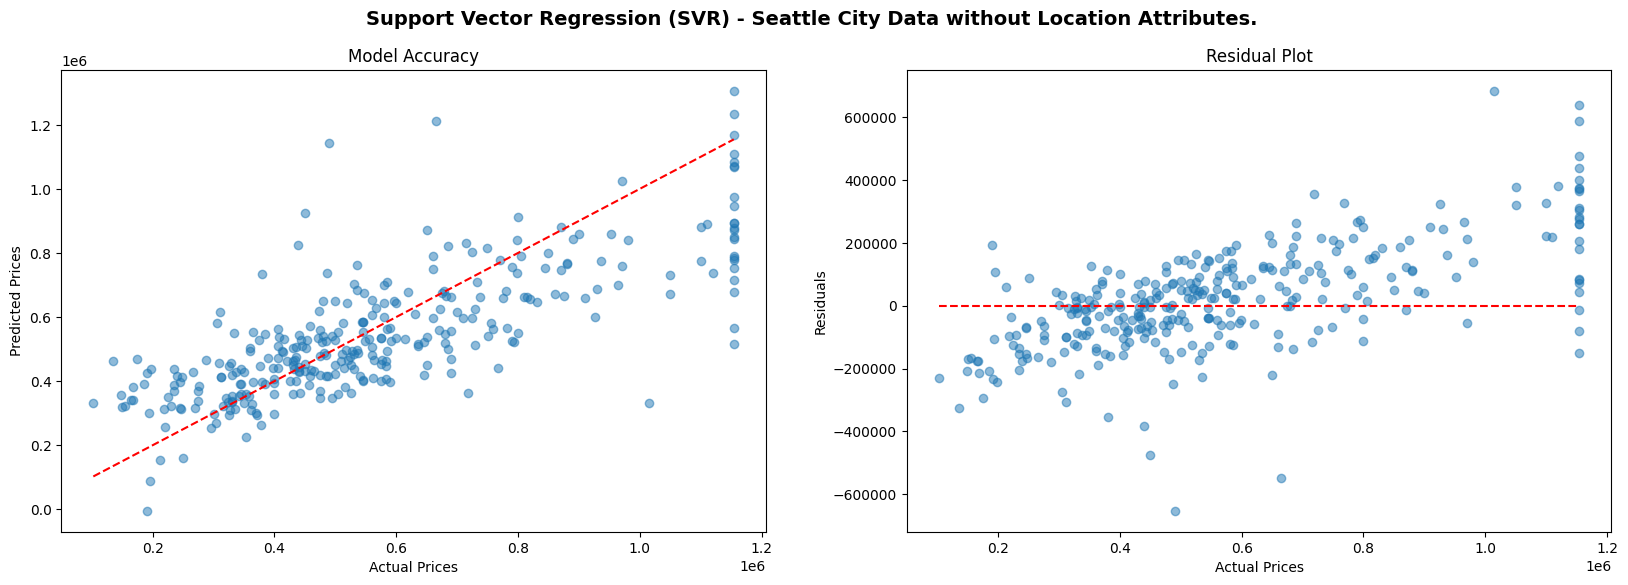

In [184]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Seattle City Data without Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

## **Decision Tree Regression**

### **Decision Tree** - Multiple Cities Data **with** Location Attributes.

In [185]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)

In [186]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 15), (911, 15), (3640,), (911,))

In [187]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Multi_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Multi_With_Location} seconds")

Elapsed time: 0.03152775764465332 seconds


In [188]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Multi_With_Location = End_Time - Start_Time

MSE_DTree_Multi_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_DTree_Multi_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DTree_Multi_With_Location = r2_score(y_test, predictions)

print('Decision Tree Regression - Multiple Cities Data With Location Attributes')
print(f'MSE: {MSE_DTree_Multi_With_Location:.4f}')
print(f'RMSE: {RMSE_DTree_Multi_With_Location:.4f}')
print(f'R2 Score: {R2_DTree_Multi_With_Location:.12f}')

Decision Tree Regression - Multiple Cities Data With Location Attributes
MSE: 138046295.6703
RMSE: 11749.3104
R2 Score: 0.997929120972


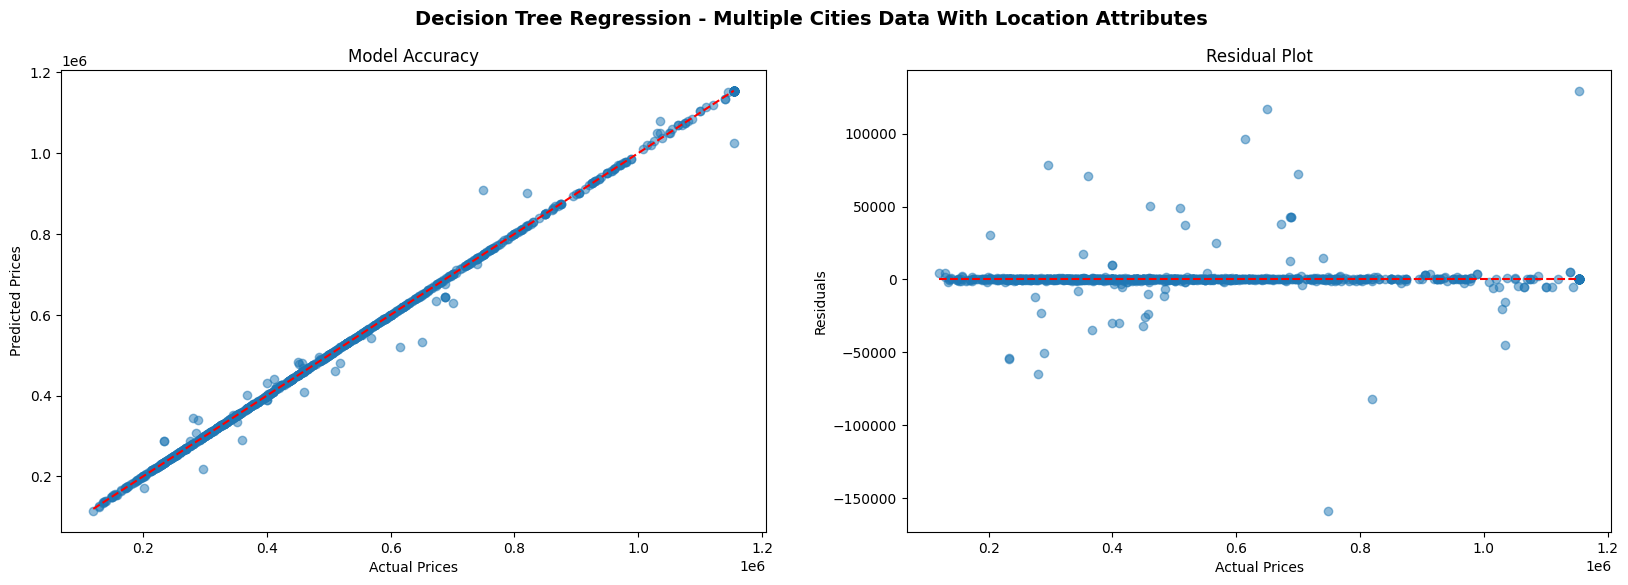

In [189]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression - Multiple Cities Data With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Decision Tree** - Multiple Cities Data **without** Location Attributes.

In [190]:
Data_X_Without_Location = df.drop(columns=['price', 'city', 'statezip', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)

In [191]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 12), (911, 12), (3640,), (911,))

In [192]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Multi_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Multi_Without_Location} seconds")

Elapsed time: 0.03567051887512207 seconds


In [193]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Multi_Without_Location = End_Time - Start_Time

MSE_DTree_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_DTree_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DTree_Multi_Without_Location = r2_score(y_test, predictions)

print('Decision Tree Regression - Multiple Cities Data Without Location Attributes')
print(f'MSE: {MSE_DTree_Multi_Without_Location:.4f}')
print(f'RMSE: {RMSE_DTree_Multi_Without_Location:.4f}')
print(f'R2 Score: {R2_DTree_Multi_Without_Location:.12f}')

Decision Tree Regression - Multiple Cities Data Without Location Attributes
MSE: 49838889541.2966
RMSE: 223246.2531
R2 Score: 0.252350013202


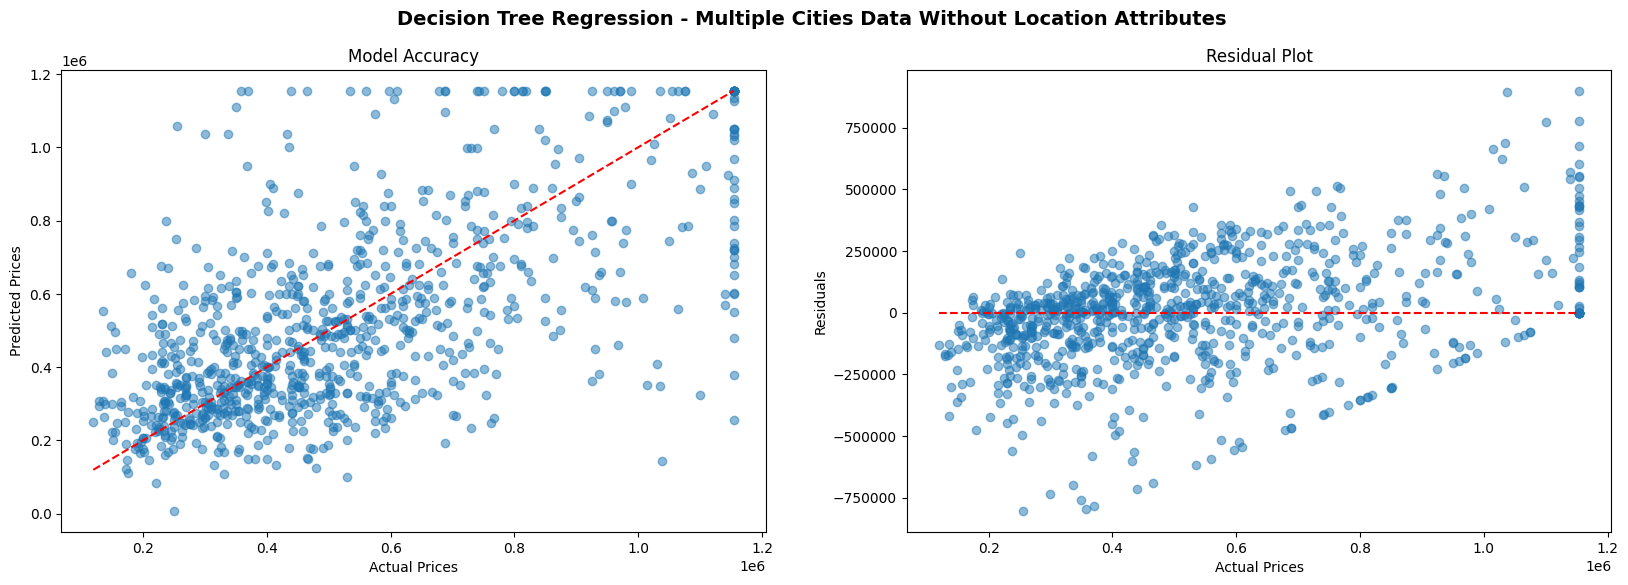

In [194]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression - Multiple Cities Data Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Decision Tree** - Seattle City Data **with** Location Attributes.

In [195]:
Seattle_Data_X = seattle_df.drop(columns=['price'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)


In [196]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 14), (313, 14), (1248,), (313,))

In [197]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Seattle_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Seattle_With_Location} seconds")

Elapsed time: 0.01717853546142578 seconds


In [198]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Seattle_With_Location = End_Time - Start_Time

MSE_DT_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_DT_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DT_Seattle_With_Location = r2_score(y_test, predictions)

print('Decision Tree Regression - Seattle City Data with Location Attributes.')
print(f'MSE: {MSE_DT_Seattle_With_Location:.4f}')
print(f'RMSE: {RMSE_DT_Seattle_With_Location:.4f}')
print(f'R2 Score: {R2_DT_Seattle_With_Location:.12f}')

Decision Tree Regression - Seattle City Data with Location Attributes.
MSE: 1158517420.7744
RMSE: 34037.0008
R2 Score: 0.983096830612


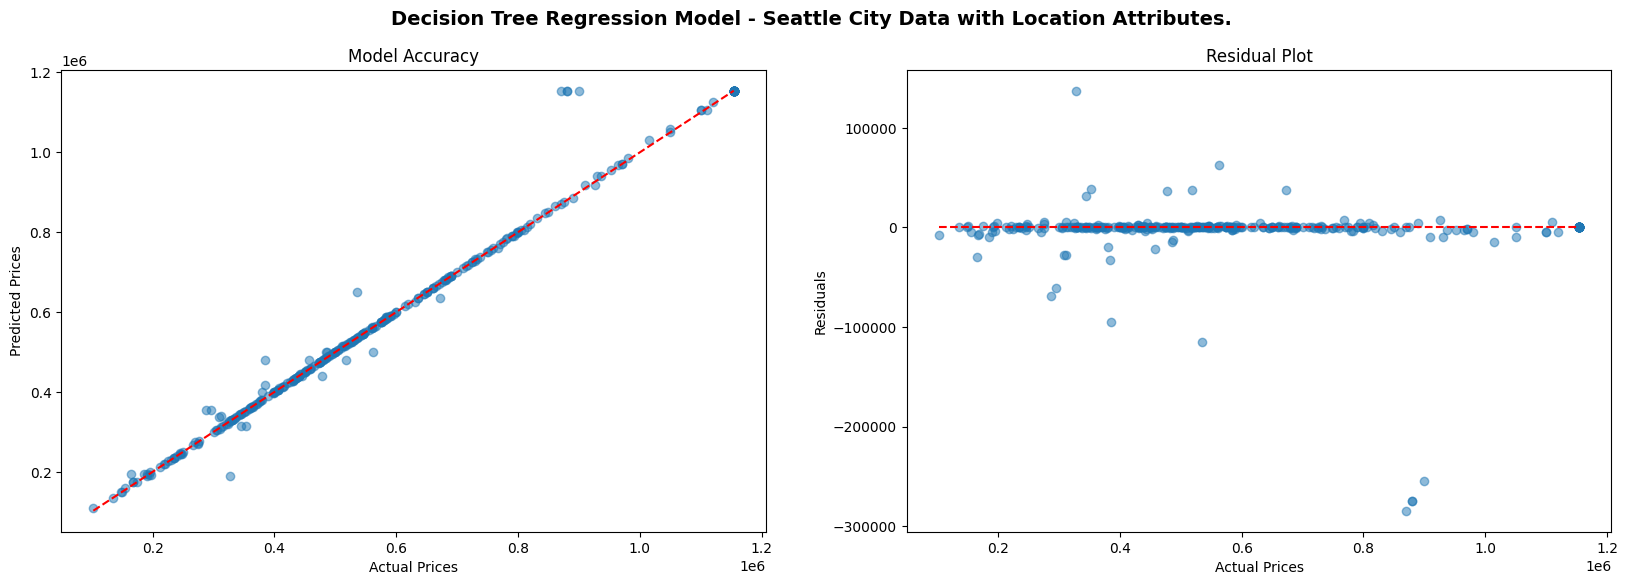

In [199]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression Model - Seattle City Data with Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

### **Decision Tree** - Seattle City Data **without** Location Attributes.

In [200]:
Seattle_Data_X_Without_Location = seattle_df.drop(columns=['price', 'statezip', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X_Without_Location, Seattle_Data_Y, test_size=0.2, random_state=92)

In [201]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 12), (313, 12), (1248,), (313,))

In [202]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Seattle_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Seattle_Without_Location} seconds")

Elapsed time: 0.015680551528930664 seconds


In [203]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Seattle_Without_Location = End_Time - Start_Time

MSE_DT_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_DT_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DT_Seattle_Without_Location = r2_score(y_test, predictions)

print('Decision Tree Regression - Seattle City Data without Location Attributes.')
print(f'MSE: {MSE_DT_Seattle_Without_Location:.4f}')
print(f'RMSE: {RMSE_DT_Seattle_Without_Location:.4f}')
print(f'R2 Score: {R2_DT_Seattle_Without_Location:.12f}')

Decision Tree Regression - Seattle City Data without Location Attributes.
MSE: 51700626568.4348
RMSE: 227377.7178
R2 Score: 0.245669997975


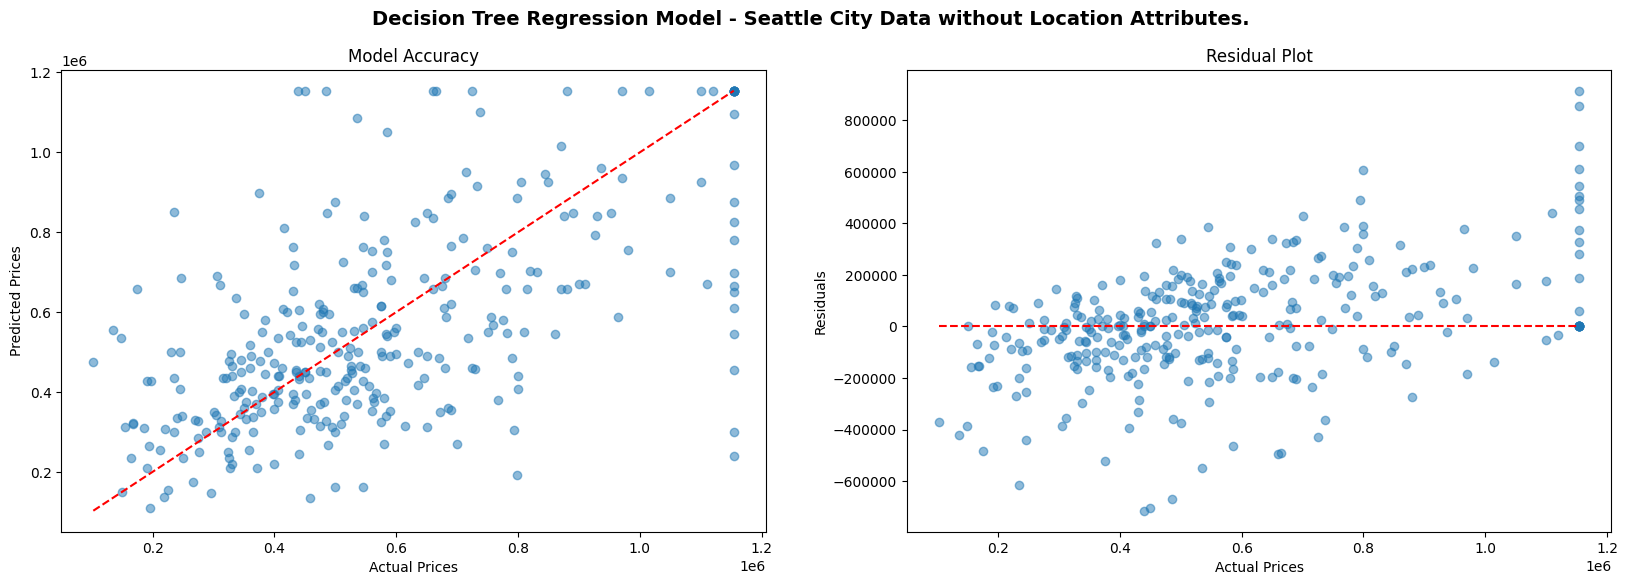

In [204]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression Model - Seattle City Data without Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

## **Random Forest Regression**

### **Random Forest** - Multiple Cities Data **with** Location Attributes.

In [205]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)

In [206]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 15), (911, 15), (3640,), (911,))

In [207]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Multi_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Multi_With_Location} seconds")

Elapsed time: 23.26865792274475 seconds


In [208]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Multi_With_Location = End_Time - Start_Time

MSE_RForest_Multi_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_RForest_Multi_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RForest_Multi_With_Location = r2_score(y_test, predictions)

print('Random Forest Regression - Multiple Cities Data With Location Attributes')
print(f'MSE: {MSE_RForest_Multi_With_Location:.4f}')
print(f'RMSE: {RMSE_RForest_Multi_With_Location:.4f}')
print(f'R2 Score: {R2_RForest_Multi_With_Location:.12f}')

Random Forest Regression - Multiple Cities Data With Location Attributes
MSE: 102975574.8743
RMSE: 10147.6882
R2 Score: 0.998455228680


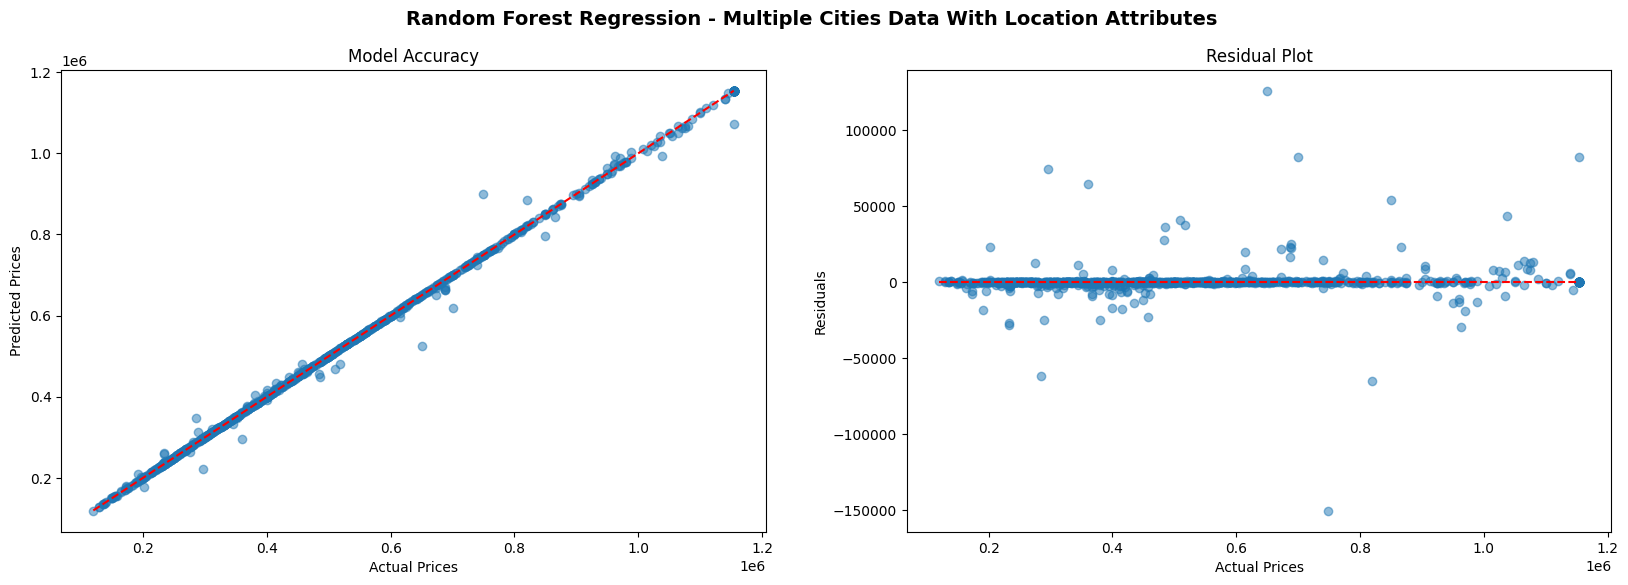

In [209]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression - Multiple Cities Data With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Random Forest** - Multiple Cities Data **without** Location Attributes.

In [210]:
Data_X_Without_Location = df.drop(columns=['price', 'city', 'statezip', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)

In [211]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 12), (911, 12), (3640,), (911,))

In [212]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Multi_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Multi_Without_Location} seconds")

Elapsed time: 21.01692509651184 seconds


In [213]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Multi_Without_Location = End_Time - Start_Time

MSE_RForest_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_RForest_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RForest_Multi_Without_Location = r2_score(y_test, predictions)

print('Random Forest Regression - Multiple Cities Data Without Location Attributes')
print(f'MSE: {MSE_RForest_Multi_Without_Location:.4f}')
print(f'RMSE: {RMSE_RForest_Multi_Without_Location:.4f}')
print(f'R2 Score: {R2_RForest_Multi_Without_Location:.12f}')

Random Forest Regression - Multiple Cities Data Without Location Attributes
MSE: 25811669509.6773
RMSE: 160660.1055
R2 Score: 0.612790442448


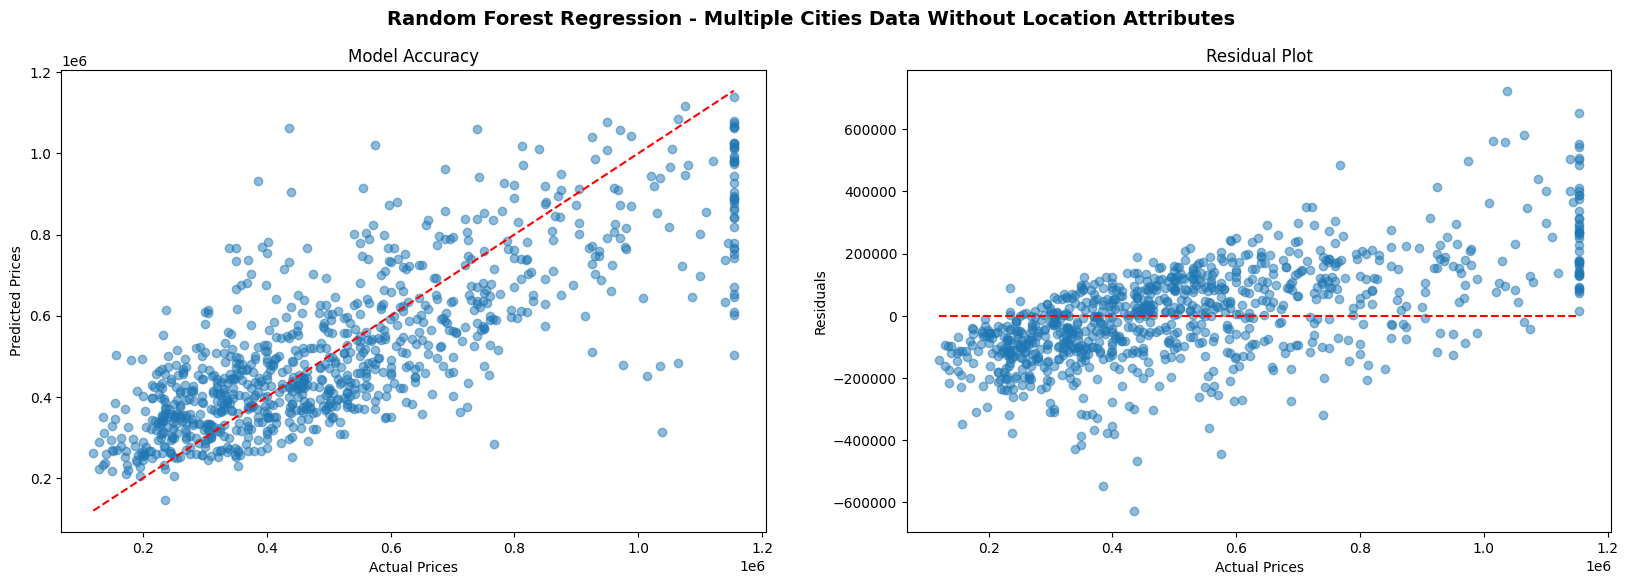

In [214]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression - Multiple Cities Data Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Random Forest** - Seattle City Data **with** Location Attributes.

In [215]:
Seattle_Data_X = seattle_df.drop(columns=['price'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)


In [216]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 14), (313, 14), (1248,), (313,))

In [217]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Seattle_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Seattle_With_Location} seconds")

Elapsed time: 8.490162134170532 seconds


In [218]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Seattle_With_Location = End_Time - Start_Time

MSE_RF_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_RF_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RF_Seattle_With_Location = r2_score(y_test, predictions)

print('Random Forest Regression - Seattle City Data with Location Attributes.')
print(f'MSE: {MSE_RF_Seattle_With_Location:.4f}')
print(f'RMSE: {RMSE_RF_Seattle_With_Location:.4f}')
print(f'R2 Score: {R2_RF_Seattle_With_Location:.12f}')

Random Forest Regression - Seattle City Data with Location Attributes.
MSE: 109984495.6159
RMSE: 10487.3493
R2 Score: 0.998395288214


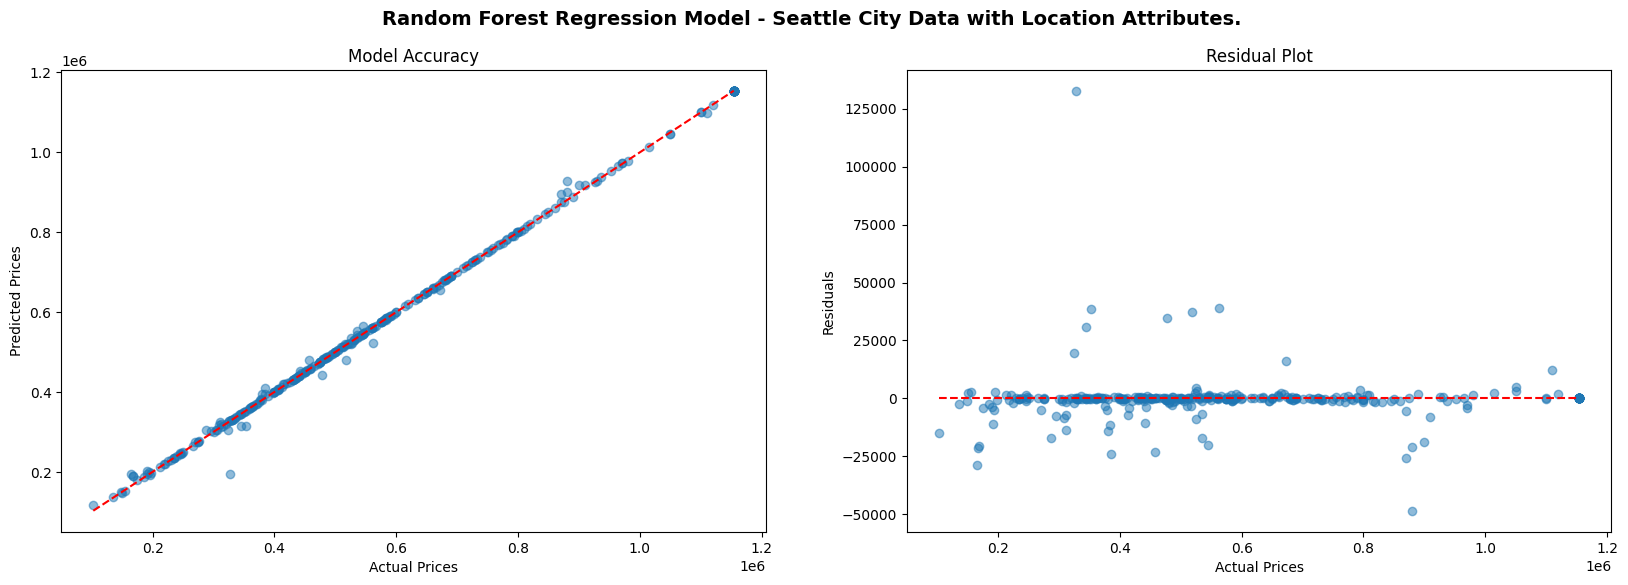

In [219]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression Model - Seattle City Data with Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

### **Random Forest** - Seattle City Data **without** Location Attributes.

In [220]:
Seattle_Data_X_Without_Location = seattle_df.drop(columns=['price', 'statezip', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X_Without_Location, Seattle_Data_Y, test_size=0.2, random_state=92)

In [221]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 12), (313, 12), (1248,), (313,))

In [222]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Seattle_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Seattle_Without_Location} seconds")

Elapsed time: 6.874600172042847 seconds


In [223]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Seattle_Without_Location = End_Time - Start_Time

MSE_RF_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_RF_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RF_Seattle_Without_Location = r2_score(y_test, predictions)

print('Random Forest Regression - Seattle City Data without Location Attributes.')
print(f'MSE: {MSE_RF_Seattle_Without_Location:.4f}')
print(f'RMSE: {RMSE_RF_Seattle_Without_Location:.4f}')
print(f'R2 Score: {R2_RF_Seattle_Without_Location:.12f}')

Random Forest Regression - Seattle City Data without Location Attributes.
MSE: 26995605074.4360
RMSE: 164303.3934
R2 Score: 0.606124796118


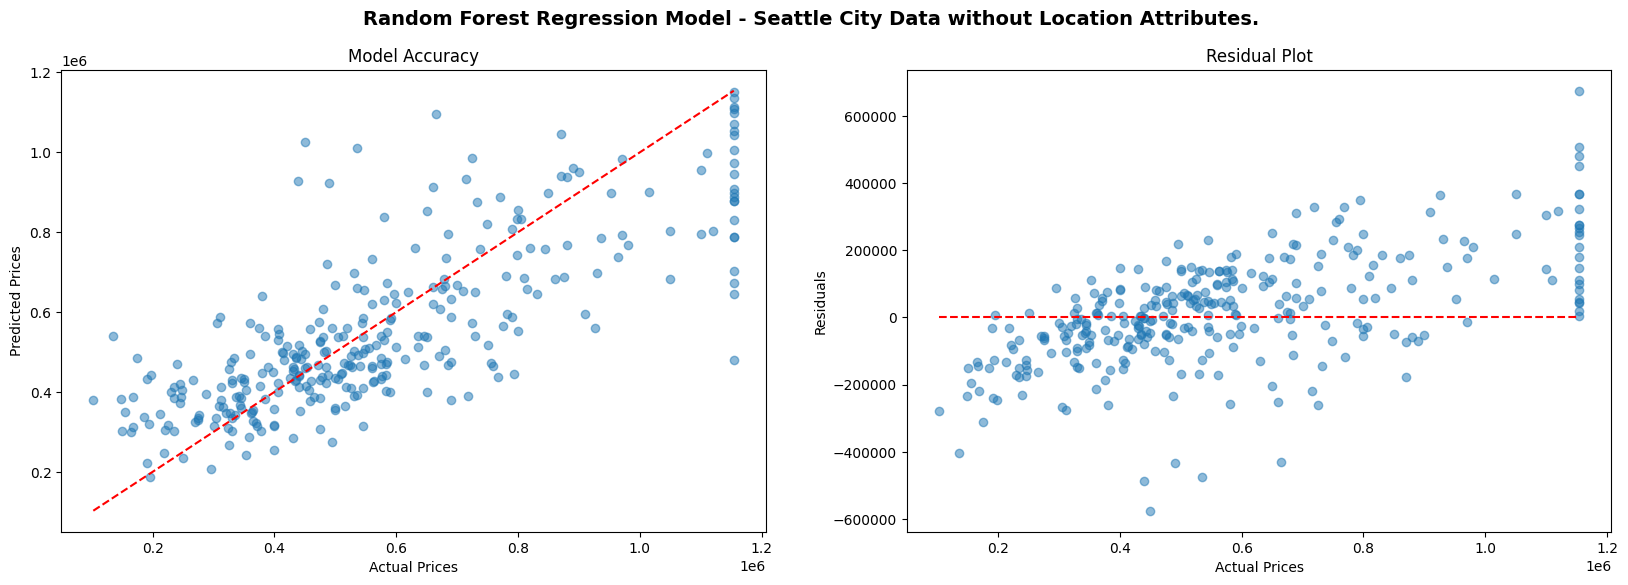

In [224]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression Model - Seattle City Data without Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

# **Comparing The Models' Perfomance**



In [225]:
All_R2_Score_Data = {
    'Data_Set': ['Multiple Cities Data With Location', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data Without Location',
                 'Multiple Cities Data With Location', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data Without Location',
                 'Multiple Cities Data With Location', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data Without Location',
                 'Multiple Cities Data With Location', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data Without Location',],

    'Models': ['Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression',
              'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)',
              'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression',
              'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression'],

    'R2_Score': [R2_Linear_Multi_With_Location, R2_Linear_Multi_Without_Location, R2_Linear_Seattle_With_Location, R2_Linear_Seattle_Without_Location,
                    R2_SVR_Multi_With_Location, R2_SVR_Multi_Without_Location, R2_SVR_Seattle_With_Location, R2_SVR_Seattle_Without_Location,
                    R2_DTree_Multi_With_Location, R2_DTree_Multi_Without_Location, R2_DT_Seattle_With_Location, R2_DT_Seattle_Without_Location,
                    R2_RForest_Multi_With_Location, R2_RForest_Multi_Without_Location, R2_RF_Seattle_With_Location, R2_RF_Seattle_Without_Location]
}

All_R2_Score_df = pd.DataFrame(All_R2_Score_Data)
print(All_R2_Score_df)

                                 Data_Set                           Models  \
0      Multiple Cities Data With Location                Linear Regression   
1   Multiple Cities Data Without Location                Linear Regression   
2         Seattle City Data With Location                Linear Regression   
3      Seattle City Data Without Location                Linear Regression   
4      Multiple Cities Data With Location  Support Vector Regression (SVR)   
5   Multiple Cities Data Without Location  Support Vector Regression (SVR)   
6         Seattle City Data With Location  Support Vector Regression (SVR)   
7      Seattle City Data Without Location  Support Vector Regression (SVR)   
8      Multiple Cities Data With Location         Decision Tree Regression   
9   Multiple Cities Data Without Location         Decision Tree Regression   
10        Seattle City Data With Location         Decision Tree Regression   
11     Seattle City Data Without Location         Decision Tree 

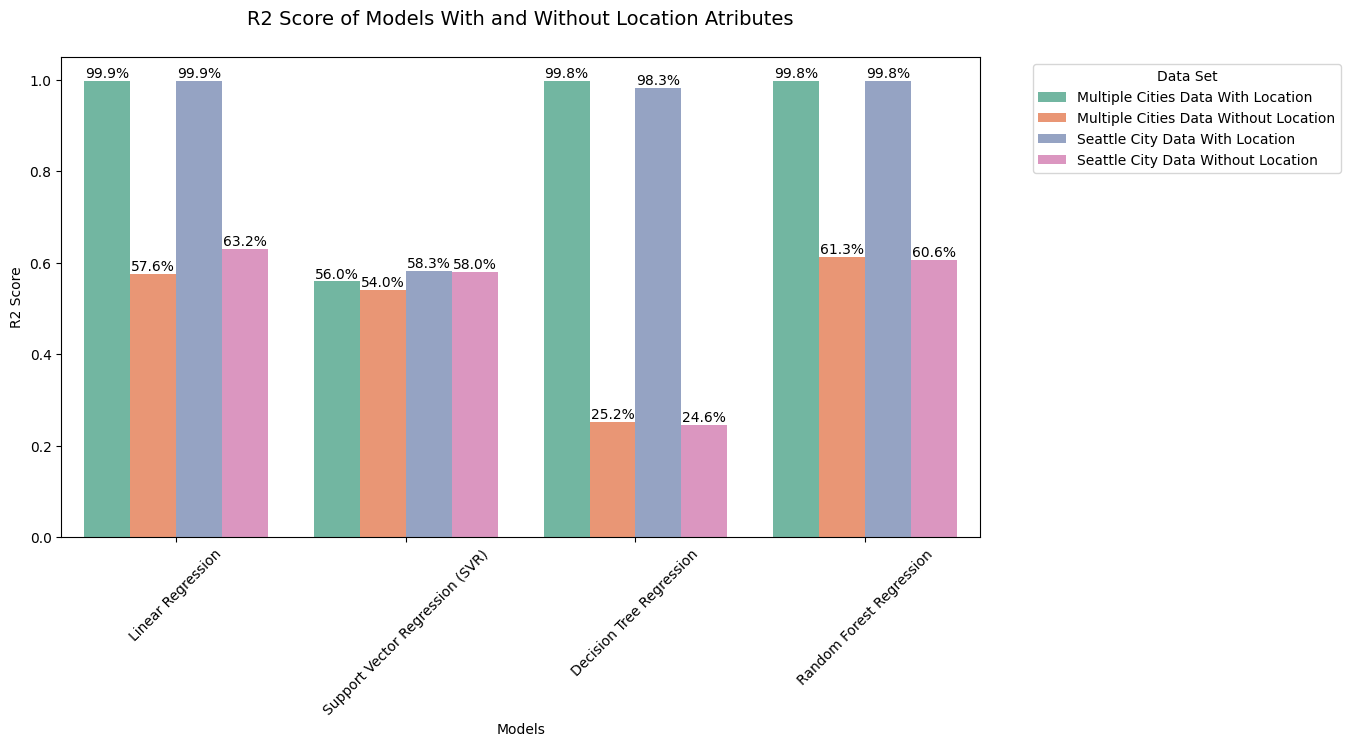

In [226]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=All_R2_Score_df, y='R2_Score', x='Models', hue='Data_Set', palette='Set2')
plt.title('R2 Score of Models With and Without Location Atributes', fontsize=14, y=1.05)
plt.ylabel('R2 Score')
plt.xlabel('Models')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.legend(title='Data Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Adding percentages:
for p in ax.patches:
    height = p.get_height()
    # Formating as percentage with 1 decimal place
    percentage = f'{height:.1%}'

    # Getting x and y coordinates for text position
    x = p.get_x() + p.get_width() / 2
    y = height

    if height != 0:
      ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [227]:
All_RMSE_Data = {
    'Data_Set': ['Multiple Cities Data With Location', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data Without Location',
                 'Multiple Cities Data With Location', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data Without Location',
                 'Multiple Cities Data With Location', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data Without Location',
                 'Multiple Cities Data With Location', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data Without Location',],

    'Models': ['Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression',
              'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)',
              'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression',
              'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression'],

    'RMSE_Values': [RMSE_Linear_Multi_With_Location, RMSE_Linear_Multi_Without_Location, RMSE_Linear_Seattle_With_Location, RMSE_Linear_Seattle_Without_Location,
                    RMSE_SVR_Multi_With_Location, RMSE_SVR_Multi_Without_Location, RMSE_SVR_Seattle_With_Location, RMSE_SVR_Seattle_Without_Location,
                    RMSE_DTree_Multi_With_Location, RMSE_DTree_Multi_Without_Location, RMSE_DT_Seattle_With_Location, RMSE_DT_Seattle_Without_Location,
                    RMSE_RForest_Multi_With_Location, RMSE_RForest_Multi_Without_Location, RMSE_RF_Seattle_With_Location, RMSE_RF_Seattle_Without_Location]
}

All_RMSE_df = pd.DataFrame(All_RMSE_Data)
print(All_RMSE_df)

                                 Data_Set                           Models  \
0      Multiple Cities Data With Location                Linear Regression   
1   Multiple Cities Data Without Location                Linear Regression   
2         Seattle City Data With Location                Linear Regression   
3      Seattle City Data Without Location                Linear Regression   
4      Multiple Cities Data With Location  Support Vector Regression (SVR)   
5   Multiple Cities Data Without Location  Support Vector Regression (SVR)   
6         Seattle City Data With Location  Support Vector Regression (SVR)   
7      Seattle City Data Without Location  Support Vector Regression (SVR)   
8      Multiple Cities Data With Location         Decision Tree Regression   
9   Multiple Cities Data Without Location         Decision Tree Regression   
10        Seattle City Data With Location         Decision Tree Regression   
11     Seattle City Data Without Location         Decision Tree 

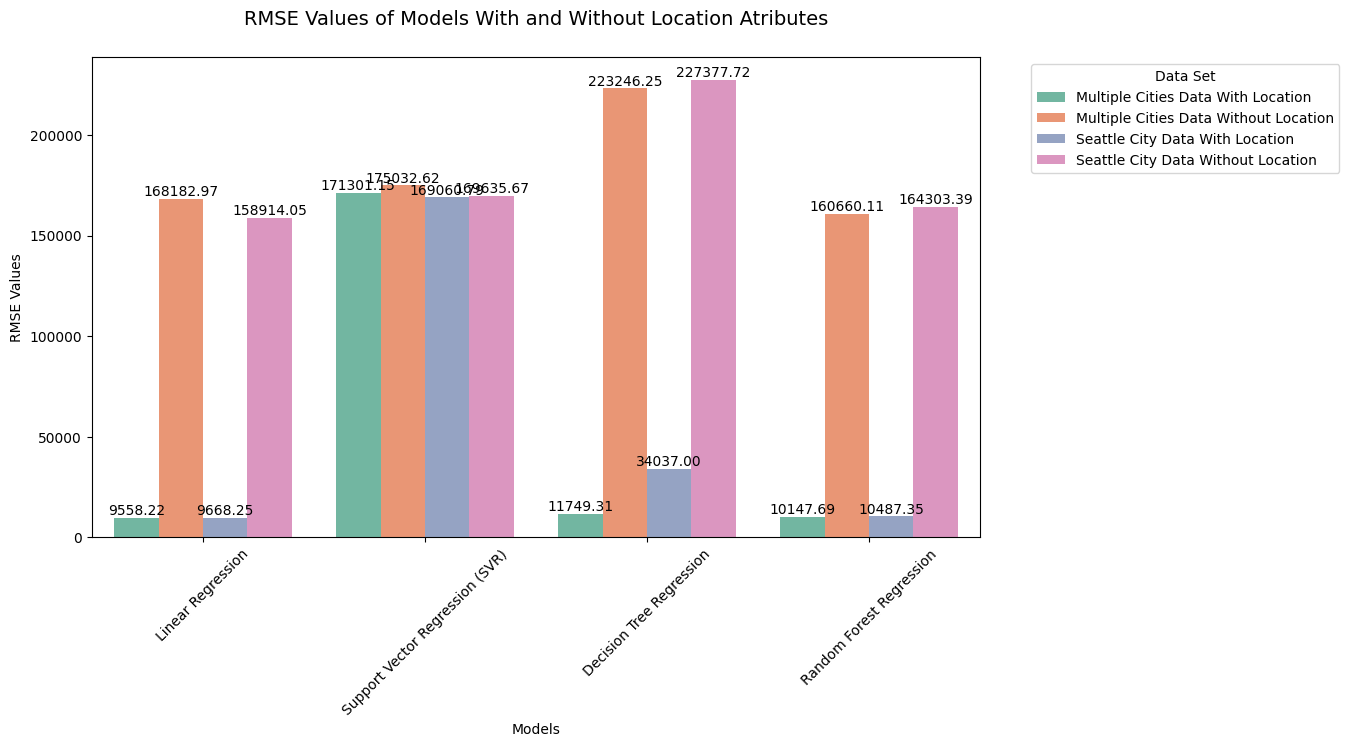

In [228]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=All_RMSE_df, y='RMSE_Values', x='Models', hue='Data_Set', palette='Set2')
plt.title('RMSE Values of Models With and Without Location Atributes', fontsize=14, y=1.05,)
plt.ylabel('RMSE Values')
plt.xlabel('Models')

plt.tight_layout()
plt.legend(title='Data Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Adding percentages:
for p in ax.patches:
    height = p.get_height()
    RMSE = f'{height:.2f}'

    # Getting x and y coordinates for text position
    x = p.get_x() + p.get_width() / 2
    y = height

    if height != 0:
      ax.annotate(RMSE, (x, y), ha='center', va='bottom')

plt.show()

In [229]:
All_Time_Data = {
    'Runtime_Data_Set': ['Training Time - Multiple Cities Data With Location', 'Prediction Time - Multiple Cities Data With Location', 'Training Time - Multiple Cities Data Without Location', 'Prediction Time - Multiple Cities Data Without Location',
                         'Training Time - Seattle City Data With Location', 'Prediction Time - Seattle City Data With Location', 'Training Time - Seattle City Data Without Location', 'Prediction Time - Seattle City Data Without Location',

                         'Training Time - Multiple Cities Data With Location', 'Prediction Time - Multiple Cities Data With Location', 'Training Time - Multiple Cities Data Without Location', 'Prediction Time - Multiple Cities Data Without Location',
                         'Training Time - Seattle City Data With Location', 'Prediction Time - Seattle City Data With Location', 'Training Time - Seattle City Data Without Location', 'Prediction Time - Seattle City Data Without Location',

                         'Training Time - Multiple Cities Data With Location', 'Prediction Time - Multiple Cities Data With Location', 'Training Time - Multiple Cities Data Without Location', 'Prediction Time - Multiple Cities Data Without Location',
                         'Training Time - Seattle City Data With Location', 'Prediction Time - Seattle City Data With Location', 'Training Time - Seattle City Data Without Location', 'Prediction Time - Seattle City Data Without Location',

                         'Training Time - Multiple Cities Data With Location', 'Prediction Time - Multiple Cities Data With Location', 'Training Time - Multiple Cities Data Without Location', 'Prediction Time - Multiple Cities Data Without Location',
                         'Training Time - Seattle City Data With Location', 'Prediction Time - Seattle City Data With Location', 'Training Time - Seattle City Data Without Location', 'Prediction Time - Seattle City Data Without Location'],

    'Models': ['Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression',
              'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)', 'Support Vector Regression (SVR)',
              'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression', 'Decision Tree Regression',
              'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression', 'Random Forest Regression'],

    'Time_in_Seconds': [Training_Time_LR_Multi_With_Location, Prediction_Time_LR_Multi_With_Location, Training_Time_LR_Multi_Without_Location, Prediction_Time_LR_Multi_Without_Location, Training_Time_LR_Seattle_With_Location, Prediction_Time_LR_Seattle_With_Location, Training_Time_LR_Seattle_Without_Location, Prediction_Time_LR_Seattle_Without_Location,
                 Training_Time_SVR_Multi_With_Location, Prediction_Time_SVR_Multi_With_Location, Training_Time_SVR_Multi_Without_Location, Prediction_Time_SVR_Multi_Without_Location, Training_Time_SVR_Seattle_With_Location, Prediction_Time_SVR_Seattle_With_Location, Training_Time_SVR_Seattle_Without_Location, Prediction_Time_SVR_Seattle_Without_Location,
                 Training_Time_DT_Multi_With_Location, Prediction_Time_DT_Multi_With_Location, Training_Time_DT_Multi_Without_Location, Prediction_Time_DT_Multi_Without_Location, Training_Time_DT_Seattle_With_Location, Prediction_Time_DT_Seattle_With_Location, Training_Time_DT_Seattle_Without_Location, Prediction_Time_DT_Seattle_Without_Location,
                 Training_Time_RF_Multi_With_Location, Prediction_Time_RF_Multi_With_Location, Training_Time_RF_Multi_Without_Location, Prediction_Time_RF_Multi_Without_Location, Training_Time_RF_Seattle_With_Location, Prediction_Time_RF_Seattle_With_Location, Training_Time_RF_Seattle_Without_Location, Prediction_Time_RF_Seattle_Without_Location,]
}

All_Time_Df = pd.DataFrame(All_Time_Data)
print(All_Time_Df)

                                     Runtime_Data_Set  \
0   Training Time - Multiple Cities Data With Loca...   
1   Prediction Time - Multiple Cities Data With Lo...   
2   Training Time - Multiple Cities Data Without L...   
3   Prediction Time - Multiple Cities Data Without...   
4     Training Time - Seattle City Data With Location   
5   Prediction Time - Seattle City Data With Location   
6   Training Time - Seattle City Data Without Loca...   
7   Prediction Time - Seattle City Data Without Lo...   
8   Training Time - Multiple Cities Data With Loca...   
9   Prediction Time - Multiple Cities Data With Lo...   
10  Training Time - Multiple Cities Data Without L...   
11  Prediction Time - Multiple Cities Data Without...   
12    Training Time - Seattle City Data With Location   
13  Prediction Time - Seattle City Data With Location   
14  Training Time - Seattle City Data Without Loca...   
15  Prediction Time - Seattle City Data Without Lo...   
16  Training Time - Multiple Ci

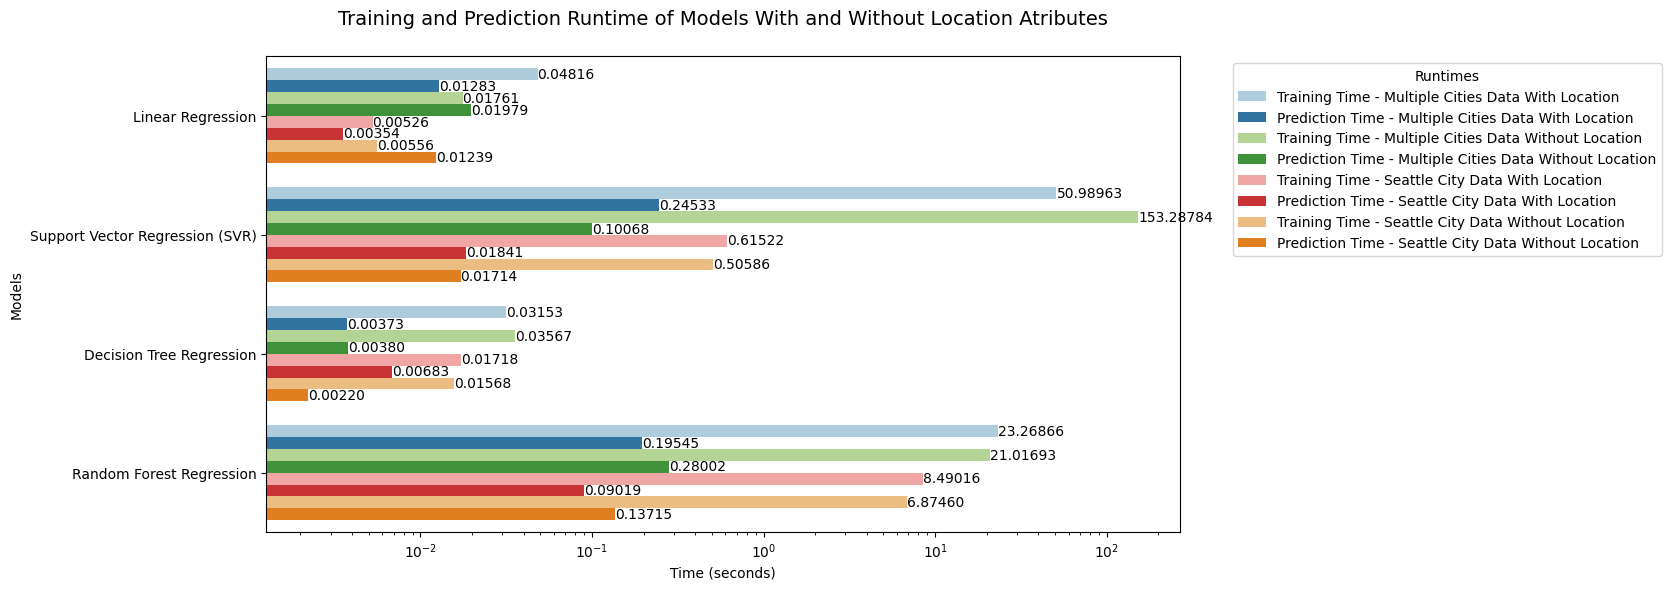

In [230]:
#creating a custom palette, as i didn't like blue and green from paired palette
#paired_palette = sns.color_palette("Paired")
#custom_palette = paired_palette[6:]

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=All_Time_Df, x='Time_in_Seconds', y='Models', hue='Runtime_Data_Set', palette='Paired', orient='h')
plt.title('Training and Prediction Runtime of Models With and Without Location Atributes', fontsize=14, y=1.05)
plt.xlabel('Time (seconds)')
plt.ylabel('Models')
plt.xscale('log')
plt.tight_layout()
plt.legend(title='Runtimes', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adding time values next to the bars
for p in ax.patches:
    width = p.get_width()
    runtime = f'{width:.5f}'

    # Getting x and y coordinates for text position
    x = width
    y = p.get_y() + p.get_height() / 2

    ax.annotate(runtime, (x, y), ha='left', va='center')

plt.show()

# **Summary**

Based on the comparison of these metrics, it's clear that the model which includes location attributes performs better in all aspects. It shows lower MSE and a higher R2 Score, indicating that adding location information improves the model's ability to predict house prices accurately.

Therefore, it's safe to say that including location attributes significantly improves the model's predictive capability for house prices.